In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import required libraries
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specifics
import keras
from keras.models import Sequential,load_model, save_model
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model 

In [ ]:
# فراخوانی داده ها از فایل اسکل و تولید دیتا فریم از روی آن
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data.xlsx')

In [ ]:
df.describe()

Tremor location planar distance from the center of the summit in km  \
count                                       1.931240e+05                     
mean                                        4.207150e+06                     
std                                         4.950251e+02                     
min                                         4.202600e+06                     
25%                                         4.206900e+06                     
50%                                         4.207100e+06                     
75%                                         4.207500e+06                     
max                                         4.211500e+06                     

       Tremor location depth in km  Total Infrasonic counts  Radar RMS EMON  \
count                244150.000000            216144.000000   228882.000000   
mean                   1882.519390                 1.247835        0.077840   
std                     833.461913                 7.466441        0.927998   
min                   -2500.000000                 0.000000       -0.601200   
25%                    1450.000000                 0.000000       -0.047800   
50%                    1843.700000                 0.000000        0.000000   
75%                    2540.500000                 0.000000        0.059400   
max                    3500.000000               154.000000       54.048000   

       Infrasonic RMS EBCN  Infrasonic RMS ECPN  Infrasonic RMS ESLN  \
count        157361.000000        171247.000000        177120.000000   
mean             19.455121            11.462513            12.361518   
std              23.427940            18.301308            23.717639   
min               0.300000             0.064822             0.794130   
25%               7.838900             1.785600             4.331075   
50%              12.517000             5.410100             7.076900   
75%              20.971000            13.141500            12.587000   
max             474.900000           486.740000           993.510000   

       Tremor RMS EBCN  Tremor RMS ECBD  Tremor RMS ECNE  ...  \
count    192999.000000    246342.000000    220854.000000  ...   
mean          4.510372         0.887112         6.322937  ...   
std           6.159894         2.563274       105.885648  ...   
min           0.339580         0.116540         0.465040  ...   
25%           2.607400         0.408270         2.665125  ...   
50%           3.486000         0.569560         3.765950  ...   
75%           4.685800         0.780030         5.297275  ...   
max         287.690000       629.820000     37542.000000  ...   

       Tremor RMS ESPC  Tremor RMS ESVO  Spacetime Infrasonic counts  \
count    241530.000000    228821.000000                260989.000000   
mean          1.051462         1.483793                    47.548949   
std           2.378224         4.466941                   254.205231   
min           0.136910         0.172080                     0.000000   
25%           0.508302         0.770990                     0.000000   
50%           0.680490         1.079500                     0.350480   
75%           0.893347         1.462400                     6.000000   
max         216.920000      1388.900000                  9694.000000   

       Tilt derivative  Normalized Median of Tremor RMS  \
count    204104.000000                    261813.000000   
mean          0.003132                         0.704768   
std           0.670486                         4.460397   
min         -28.233000                        -1.209500   
25%          -0.278423                        -0.429550   
50%          -0.009323                        -0.013018   
75%           0.271273                         0.492740   
max          28.174000                       188.800000   

       Weighted Normalized Median of Tremor RMS  \
count                             260224.000000   
mean                                   0.587136   
std                    

In [ ]:
# یک نمونه از داده ها
df.iloc[0,:]

Tremor location planar distance from the center of the summit in km                    NaN
Tremor location depth in km                                                            NaN
Total Infrasonic counts                                                                NaN
Radar RMS EMON                                                                   -0.053026
Infrasonic RMS EBCN                                                                    NaN
Infrasonic RMS ECPN                                                                    NaN
Infrasonic RMS ESLN                                                                    NaN
Tremor RMS EBCN                                                                     3.1697
Tremor RMS ECBD                                                                    0.57588
Tremor RMS ECNE                                                                     3.7924
Tremor RMS ECPN                                                                     2.8564

In [ ]:
# محاسبه تعداد نن ها در هر ستون
nansum = {}
for r in df.keys():
  nansum[r] = df[r].isna().sum()

In [ ]:
# تعداد نن ها در هر ستون
nansum

{'Tremor location planar distance from the center of the summit in km': 122524,
 'Tremor location depth in km': 71498,
 'Total Infrasonic counts': 99504,
 'Radar RMS EMON': 86766,
 'Infrasonic RMS EBCN': 158287,
 'Infrasonic RMS ECPN': 144401,
 'Infrasonic RMS ESLN': 138528,
 'Tremor RMS EBCN': 122649,
 'Tremor RMS ECBD': 69306,
 'Tremor RMS ECNE': 94794,
 'Tremor RMS ECPN': 85689,
 'Tremor RMS ECZM': 71988,
 'Tremor RMS EMCN': 94011,
 'Tremor RMS EMFO': 100481,
 'Tremor RMS EMFS': 60817,
 'Tremor RMS EMNR': 79744,
 'Tremor RMS EMPL': 60409,
 'Tremor RMS EMSG': 79838,
 'Tremor RMS EPDN': 103871,
 'Tremor RMS EPIT': 103287,
 'Tremor RMS EPLC': 101503,
 'Tremor RMS ESLN': 78602,
 'Tremor RMS ESPC': 74118,
 'Tremor RMS ESVO': 86827,
 'Spacetime Infrasonic counts': 54659,
 'Tilt derivative': 111544,
 'Normalized Median of Tremor RMS': 53835,
 'Weighted Normalized Median of Tremor RMS': 55424,
 'Normalized Median of Infrasonic RMS': 116031,
 'TimeLine': 0,
 'Activity': 0,
 'TIME(coverted in

In [ ]:
df['Index']=list(range(df.iloc[:,1].size))

In [ ]:
ndf = df[['Tremor location depth in km',
          'Weighted Normalized Median of Tremor RMS', 
          'Spacetime Infrasonic counts', 
          'Normalized Median of Tremor RMS',
          'Tremor RMS EMFS',
          'Tremor RMS ECBD',
          'Radar RMS EMON',
          'Tremor RMS ESPC',
          'Tremor RMS ECZM',
          'TIME(coverted in matlab)',
          'Index', 'Activity']]

array([nan])

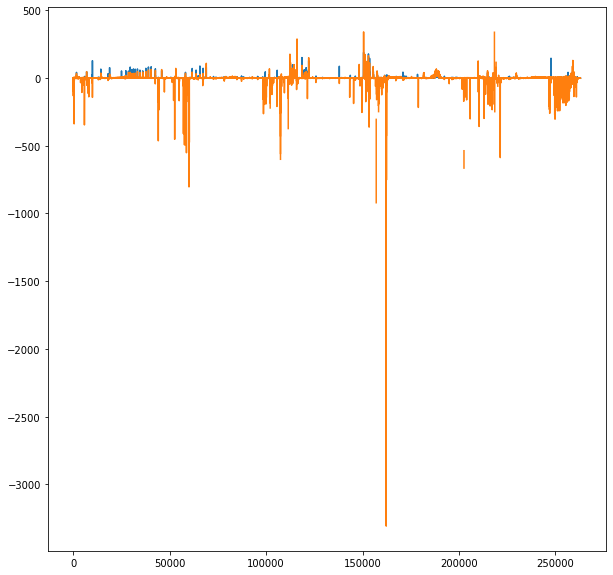

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(df['Normalized Median of Tremor RMS'])
plt.plot(df['Weighted Normalized Median of Tremor RMS'])
import numpy as np 
a = np.correlate(df['Normalized Median of Tremor RMS'], df['Weighted Normalized Median of Tremor RMS'], mode='valid')
plt.plot(a)

In [ ]:
dfff.shape

NameError: ignored

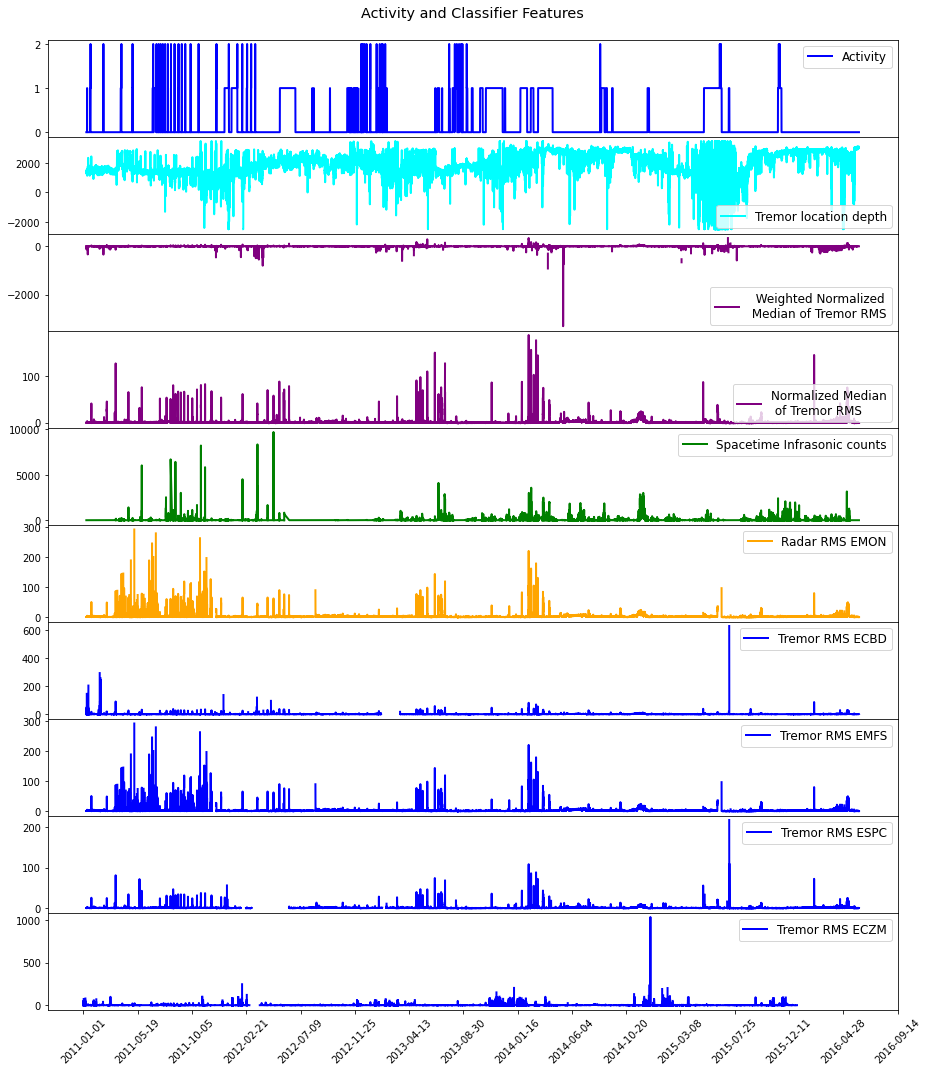

In [ ]:
# رسم کلیه دادههای انتخاب شده 
from datetime import datetime
# dff= df.copy()
# dff['Converted_time']=[datetime.timestamp(datetime.strptime(str(i), '%Y-%m-%d %H:%M:%S')) for i in df['date_time (month/day/year/hour/minute)']]
dfff = df[['Tremor location depth in km',
 'Weighted Normalized Median of Tremor RMS',
 'Spacetime Infrasonic counts',
 'Normalized Median of Tremor RMS',
 'Tremor RMS EMFS',
 'Tremor RMS ECBD',
 'Radar RMS EMON',
 'Tremor RMS ESPC',
 'Tremor RMS ECZM', 'date_time (month/day/year/hour/minute)', 'Activity' ]]

t = list(range(15,dfff['date_time (month/day/year/hour/minute)'].shape[0],20000))
tt=[]
for i in t:
  tt.append(dfff.iloc[i,-2].date())

fig, axs = plt.subplots(10, sharex=False, sharey=False, gridspec_kw={'hspace': 0}, figsize=(13,15))
# fig.suptitle('%s Episode data\n\n'%str(ep_start.date()))

axs[0].plot(list(range(dfff.shape[0])),dfff['Activity'], color='blue', linewidth = 2)
axs[0].set_title('Activity and Classifier Features\n', fontsize='x-large')
axs[0].legend(['Activity'], fontsize='large', loc=1)
axs[0].set_ylim(auto= True )
axs[0].set_xticks(t)
axs[0].set_xticklabels(str(tt))

axs[1].plot(list(range(dfff.shape[0])),dfff['Tremor location depth in km'] ,color='cyan', linewidth = 2)
axs[1].legend(['Tremor location depth'] ,loc=4, fontsize='large')

axs[2].plot(list(range(dfff.shape[0])),dfff['Weighted Normalized Median of Tremor RMS'],color='purple', linewidth = 2)
axs[2].legend(['  Weighted Normalized\n Median of Tremor RMS'],loc=4, fontsize='large')

axs[3].plot(list(range(dfff.shape[0])),dfff['Normalized Median of Tremor RMS'],color='purple', linewidth = 2)
axs[3].legend(['Normalized Median\n of Tremor RMS'],loc=4, fontsize='large')

axs[4].plot(list(range(dfff.shape[0])),dfff['Spacetime Infrasonic counts'],color='green', linewidth = 2)
axs[4].legend(['Spacetime Infrasonic counts'],loc=1, fontsize='large')

axs[5].plot(list(range(dfff.shape[0])),dfff['Tremor RMS EMFS'],color='orange', linewidth = 2)
axs[5].legend(['Radar RMS EMON'],loc=1, fontsize='large')

axs[6].plot(list(range(dfff.shape[0])),dfff['Tremor RMS ECBD'],color='blue', linewidth = 2)
axs[6].legend(['Tremor RMS ECBD'], fontsize='large')
axs[7].plot(list(range(dfff.shape[0])),dfff['Tremor RMS EMFS'],color='blue', linewidth = 2)
axs[7].legend(['Tremor RMS EMFS'], fontsize='large')
axs[8].plot(list(range(dfff.shape[0])),dfff['Tremor RMS ESPC'],color='blue', linewidth = 2)
axs[8].legend(['Tremor RMS ESPC'], fontsize='large')
axs[9].plot(list(range(dfff.shape[0])),dfff['Tremor RMS ECZM'],color='blue', linewidth = 2)
axs[9].legend(['Tremor RMS ECZM'], fontsize='large')
axs[9].set_xticks(t)
axs[9].set_xticklabels(tt, rotation=45)
plt.tight_layout()

In [ ]:
a = np.corrcoef(df['Normalized Median of Tremor RMS'].tonumpy, df['Weighted Normalized Median of Tremor RMS'].tonumpy, mode='full')
a

AttributeError: ignored

In [ ]:
ndf = df[['Tremor location depth in km',
          'Weighted Normalized Median of Tremor RMS', 
          'Spacetime Infrasonic counts', 
          'Normalized Median of Tremor RMS',
          'Tremor RMS EMFS',
          'Tremor RMS ECBD',
          'Radar RMS EMON',
          'Tremor RMS ESPC',
          'Tremor RMS ECZM',
          'date_time (month/day/year/hour/minute)', 'Activity']]

In [ ]:
ndf['Index']=list(range(ndf.iloc[:,1].size))

<ipython-input-13-698492121e4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Index']=list(range(ndf.iloc[:,1].size))


In [ ]:
ndf.describe()

Tremor location depth in km  Weighted Normalized Median of Tremor RMS  \
count                244150.000000                             260224.000000   
mean                   1882.519390                                  0.587136   
std                     833.461913                                 12.092916   
min                   -2500.000000                              -3307.300000   
25%                    1450.000000                                 -0.966882   
50%                    1843.700000                                 -0.168935   
75%                    2540.500000                                  1.043200   
max                    3500.000000                                340.020000   

       Spacetime Infrasonic counts  Normalized Median of Tremor RMS  \
count                260989.000000                    261813.000000   
mean                     47.548949                         0.704768   
std                     254.205231                         4.460397   
min                       0.000000                        -1.209500   
25%                       0.000000                        -0.429550   
50%                       0.350480                        -0.013018   
75%                       6.000000                         0.492740   
max                    9694.000000                       188.800000   

       Tremor RMS EMFS  Tremor RMS ECBD  Radar RMS EMON  Tremor RMS ESPC  \
count    254831.000000    246342.000000   228882.000000    241530.000000   
mean          2.212352         0.887112        0.077840         1.051462   
std           5.000521         2.563274        0.927998         2.378224   
min           0.228480         0.116540       -0.601200         0.136910   
25%           0.995000         0.408270       -0.047800         0.508302   
50%           1.363500         0.569560        0.000000         0.680490   
75%           1.902800         0.780030        0.059400         0.893347   
max         293.480000       629.820000       54.048000       216.920000   

       Tremor RMS ECZM  TIME(coverted in matlab)          Index       Activity  
count    243660.000000             315648.000000  315648.000000  315648.000000  
mean          0.922139             735599.996528  157823.500000       0.164576  
std           3.903789                632.776897   91119.873222       0.377177  
min           0.092454             734504.000000       0.000000       0.000000  
25%           0.412140             735051.998264   78911.750000       0.000000  
50%           0.545950             735599.996528  157823.500000       0.000000  
75%           0.727260             736147.994792  236735.250000       0.000000  
max        1034.600000             736695.993056  315647.000000       2.000000

In [ ]:
nansumndf = {}
for r in ndf.keys():
  nansumndf[r] = ndf[r].isna().sum()

In [ ]:
ndf = ndf.dropna()
a = ndf['Index'].tolist()
Index_dif = [0]
for i in range(1,len(a)):
  Index_dif.append(a[i]-a[i-1])
ndf['Index_dif']= Index_dif

(array([1.7979e+05, 5.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  1281.6,  2563.2,  3844.8,  5126.4,  6408. ,  7689.6,
         8971.2, 10252.8, 11534.4, 12816. ]),
 <a list of 10 Patch objects>)

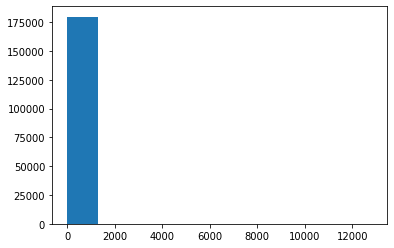

In [ ]:
plt.hist(Index_dif)

In [ ]:
nansumndf

{'Tremor location depth in km': 71498,
 'Weighted Normalized Median of Tremor RMS': 55424,
 'Spacetime Infrasonic counts': 54659,
 'Normalized Median of Tremor RMS': 53835,
 'Tremor RMS EMFS': 60817,
 'Tremor RMS ECBD': 69306,
 'Radar RMS EMON': 86766,
 'Tremor RMS ESPC': 74118,
 'Tremor RMS ECZM': 71988,
 'TIME(coverted in matlab)': 0,
 'Index': 0,
 'Activity': 0}

In [ ]:
ndf = ndf.dropna()
a = ndf['Index'].tolist()
Index_dif = [0]
for i in range(1,len(a)):
  Index_dif.append(a[i]-a[i-1])
ndf['Index_dif']= Index_dif

(array([1.79768e+05, 1.60000e+01, 2.00000e+00, 4.00000e+00, 0.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.  ,   256.32,   512.64,   768.96,  1025.28,  1281.6 ,
         1537.92,  1794.24,  2050.56,  2306.88,  2563.2 ,  2819.52,
         3075.84,  3332.16,  3588.48,  3844.8 ,  4101.12,  4357.44,
         4613.76,  4870.08,  5126.4 ,  5382.72,  5639.04,  5895.

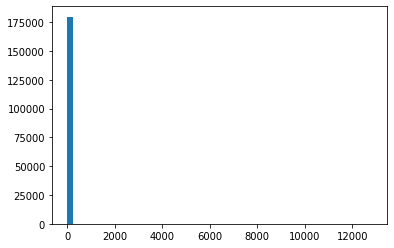

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Index_dif,50)
# در تصویر زیر مشاهده میشود که حتی تا بین دو نمونه که شامل نن نباشند بیش از 12000 مشاهده فاصل افتاده است

In [ ]:
b = ndf.to_numpy()
n_samples =2
ind16 = np.array([1]*n_samples, dtype='int')
idx = []
for i in range(b.shape[0]-n_samples):
  if np.array_equal(b[i:i+n_samples,-1].astype(int), ind16, equal_nan=False):
    idx.append(i)

c=b[[idx],:]
len(idx), ndf.shape

NameError: ignored

In [ ]:
newdf = pd.DataFrame(data=c[0,:,:], index=None, columns=['Tremor location depth in km',
          'Weighted Normalized Median of Tremor RMS', 
          'Spacetime Infrasonic counts', 
          'Normalized Median of Tremor RMS',
          'Tremor RMS EMFS',
          'Tremor RMS ECBD',
          'Radar RMS EMON',
          'Tremor RMS ESPC',
          'Tremor RMS ECZM',
          'TIME(coverted in matlab)', 'Index', 'Activity', 'Index_dif'] )

NameError: ignored

In [ ]:
newdf.describe()

Tremor location depth in km  Weighted Normalized Median of Tremor RMS  \
count                173898.000000                             173898.000000   
mean                   1990.336770                                  1.009367   
std                     673.555219                                  6.934100   
min                   -2500.000000                               -304.040000   
25%                    1500.300000                                 -0.888110   
50%                    1918.900000                                 -0.055918   
75%                    2564.200000                                  1.280075   
max                    3500.000000                                340.020000   

       Spacetime Infrasonic counts  Normalized Median of Tremor RMS  \
count                173898.000000                    173898.000000   
mean                     50.836764                         0.744515   
std                     220.045648                         4.037709   
min                       0.000000                        -1.197700   
25%                       0.000000                        -0.422730   
50%                       0.592590                        -0.003380   
75%                       9.400000                         0.549425   
max                    8210.000000                       188.800000   

       Tremor RMS EMFS  Tremor RMS ECBD  Radar RMS EMON  Tremor RMS ESPC  \
count    173898.000000    173898.000000   173898.000000    173898.000000   
mean          2.266804         0.874215        0.069136         1.037419   
std           4.297299         1.675218        0.783399         2.016447   
min           0.253280         0.116540       -0.575000         0.144370   
25%           1.032000         0.408150       -0.051000         0.503603   
50%           1.415500         0.564255       -0.000200         0.676855   
75%           1.990000         0.781438        0.065400         0.910367   
max         246.270000        86.899000       50.429000       108.290000   

       Tremor RMS ECZM  TIME(coverted in matlab)          Index  \
count    173898.000000             173898.000000  173898.000000   
mean          0.768646             735500.413855  143483.595102   
std           1.345952                488.387111   70327.744020   
min           0.119020             734624.006944   17281.000000   
25%           0.401360             735100.765625   85934.250000   
50%           0.533890             735521.788194  146561.500000   
75%           0.730300             735879.366319  198052.750000   
max          93.128000             736329.625000  262890.000000   

            Activity  Index_dif  
count  173898.000000   173898.0  
mean        0.207685        1.0  
std         0.410891        0.0  
min         0.000000        1.0  
25%         0.000000        1.0  
50%         0.000000        1.0  
75%         0.000000        1.0  
max         2.000000        1.0

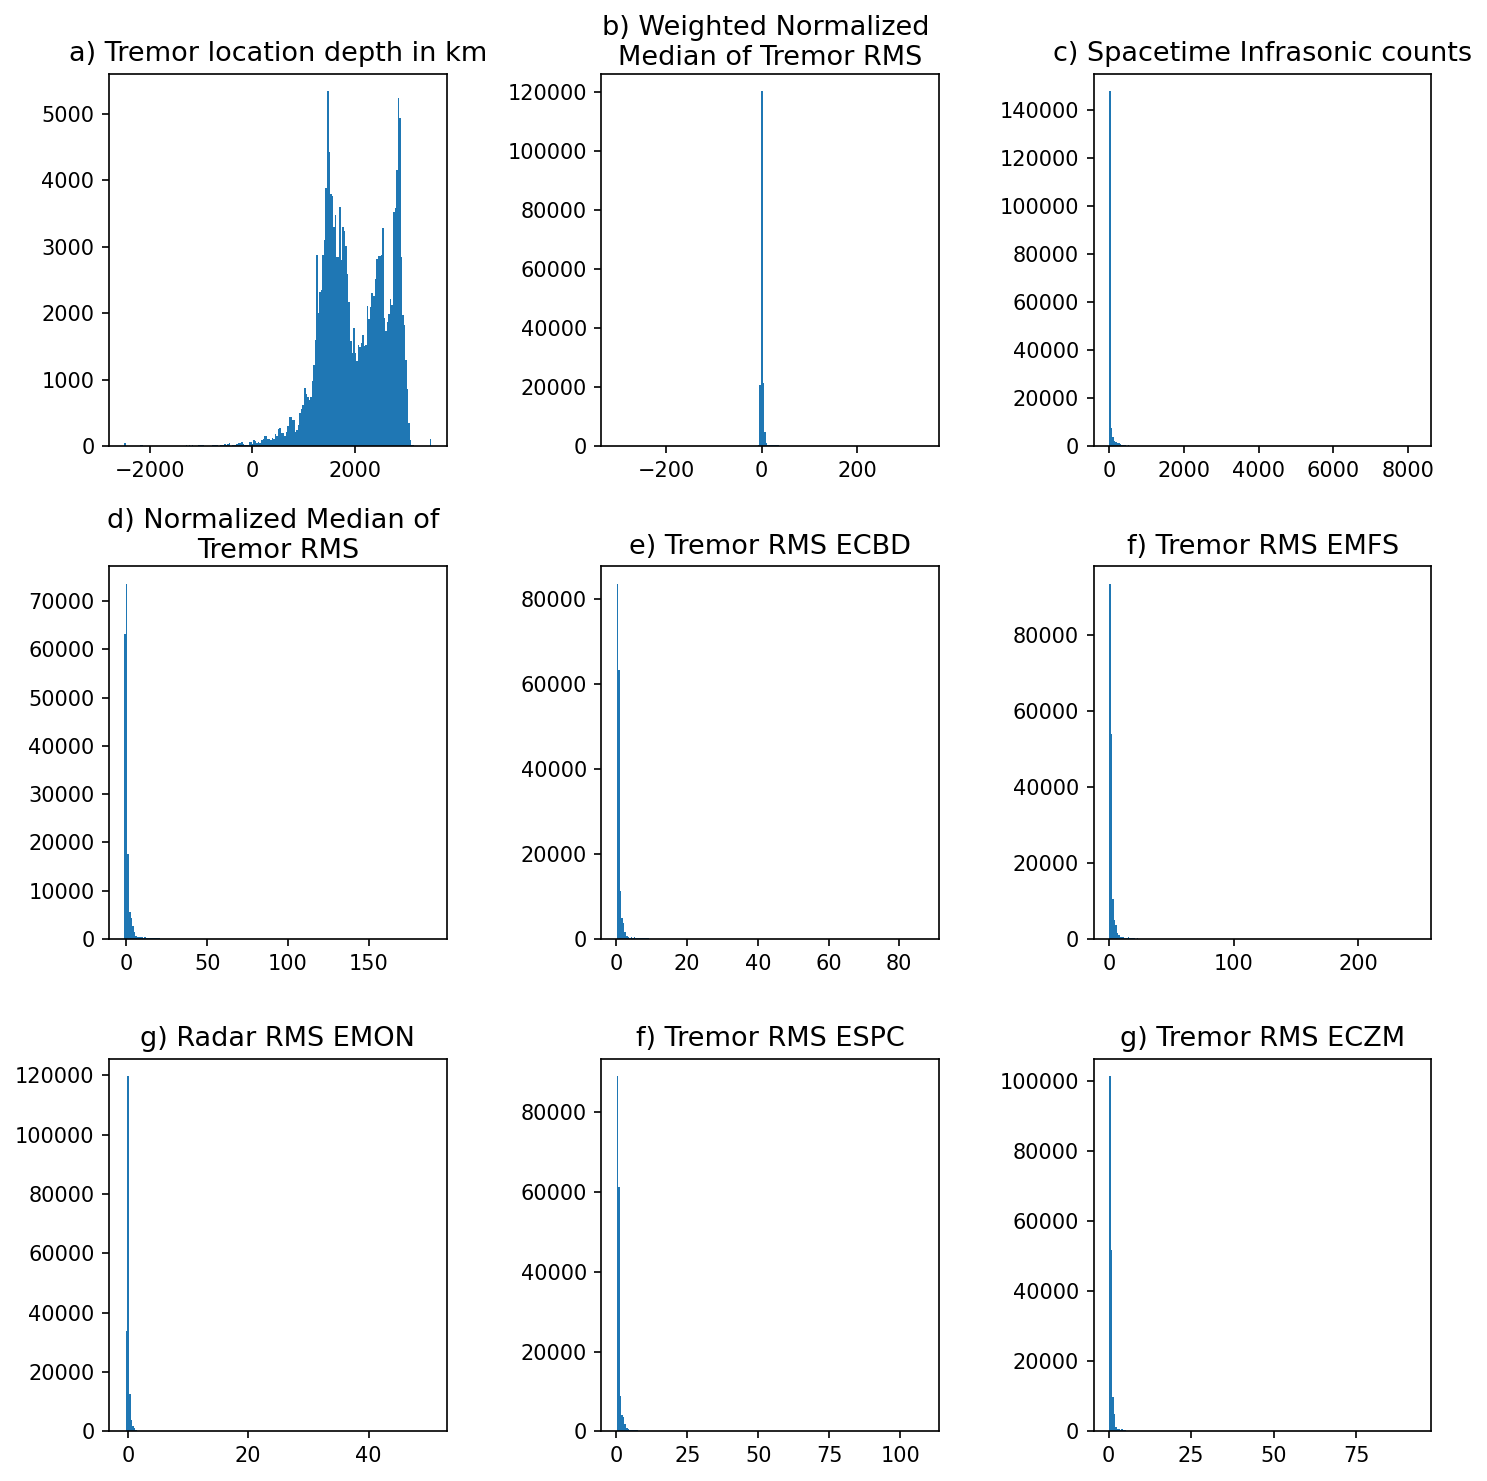

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), dpi=150)
plt.subplot(331)
plt.hist(newdf['Tremor location depth in km'] ,200)
plt.title('a) Tremor location depth in km', fontsize=13, wrap=True)
plt.subplot(332)
plt.hist(newdf['Weighted Normalized Median of Tremor RMS'],200)
plt.title('b) Weighted Normalized \nMedian of Tremor RMS', fontsize=13, wrap=True)
plt.subplot(333)
plt.hist(newdf['Spacetime Infrasonic counts'],200)
plt.title('c) Spacetime Infrasonic counts', fontsize=13, wrap=True)
plt.subplot(334)
plt.hist(newdf['Normalized Median of Tremor RMS'],200)
plt.title('d) Normalized Median of \nTremor RMS', fontsize=13, wrap=True)
plt.subplot(335)
plt.hist(newdf['Tremor RMS ECBD'],200)
plt.title('e) Tremor RMS ECBD', fontsize=13, wrap=True)
plt.subplot(336)
plt.hist(newdf['Tremor RMS EMFS'],200)
plt.title('f) Tremor RMS EMFS', fontsize=13, wrap=True)
plt.subplot(337)
plt.hist(newdf['Radar RMS EMON'],200)
plt.title('g) Radar RMS EMON', fontsize=13, wrap=True)
plt.subplot(338)
plt.hist(newdf['Tremor RMS ESPC'],200)
plt.title('f) Tremor RMS ESPC', fontsize=13, wrap=True)
plt.subplot(339)
plt.hist(newdf['Tremor RMS ECZM'],200)
plt.title('g) Tremor RMS ECZM', fontsize=13, wrap=True)
# plt.subplot(338)
# plt.hist(newdf['Normalized Median of Tremor RMS'],100)
# plt.title('h) Normalized Median of \n Tremor RMS', fontsize=13, wrap=True)
plt.tight_layout()

In [ ]:
# newdf = df.replace({'Activity': 2}, 1)
# newdf.describe()

In [ ]:
# مشخصا داده نامتوازن هستند و مشکل اصلی در مورد داده های اکتیویتی برابر دو است که تنها 542 نمونه هستند
newdf.groupby('Activity').count()

Tremor location depth in km  \
Activity                                
0.0                            138154   
1.0                             35372   
2.0                               372   

          Weighted Normalized Median of Tremor RMS  \
Activity                                             
0.0                                         138154   
1.0                                          35372   
2.0                                            372   

          Spacetime Infrasonic counts  Normalized Median of Tremor RMS  \
Activity                                                                 
0.0                            138154                           138154   
1.0                             35372                            35372   
2.0                               372                              372   

          Tremor RMS EMFS  Tremor RMS ECBD  Radar RMS EMON  Tremor RMS ESPC  \
Activity                                                                      
0.0                138154           138154          138154           138154   
1.0                 35372            35372           35372            35372   
2.0                   372              372             372              372   

          Tremor RMS ECZM  TIME(coverted in matlab)   Index  Index_dif  
Activity                                                                
0.0                138154                    138154  138154     138154  
1.0                 35372                     35372   35372      35372  
2.0                   372                       372     372        372

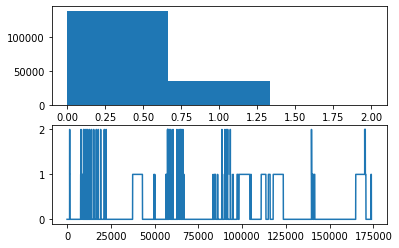

In [ ]:
plt.subplot(211)
plt.hist(newdf['Activity'], 3)
plt.subplot(212)
plt.plot(newdf['Activity'])

In [ ]:
# newdf = nrdf.replace({'Activity': 2}, 1)
data = newdf.copy()
ndata = data.drop(['Index', 'TIME(coverted in matlab)', 'Index_dif', 'Activity'],  axis=1)
ndata

Tremor location depth in km  Weighted Normalized Median of Tremor RMS  \
0                            1323.0                                  -0.74329   
1                            1323.0                                  -1.25720   
2                            1323.0                                  -0.56835   
3                            1323.0                                  -0.59872   
4                            1323.0                                  -0.41539   
...                             ...                                       ...   
173893                       3039.5                                  -1.38660   
173894                       3039.5                                  -1.52850   
173895                       3029.4                                  -1.37720   
173896                       3029.4                                  -1.31550   
173897                       3029.4                                  -1.80320   

        Spacetime Infrasonic counts  Normalized Median of Tremor RMS  \
0                           0.36908                         -0.26496   
1                           0.36812                         -0.41549   
2                           0.36715                         -0.20663   
3                           0.36618                         -0.23076   
4                           0.36522                         -0.21379   
...                             ...                              ...   
173893                      0.00000                         -0.53609   
173894                      0.00000                         -0.64316   
173895                      0.00000                         -0.55879   
173896                      0.00000                         -0.51469   
173897                      0.00000                         -0.71855   

        Tremor RMS EMFS  Tremor RMS ECBD  Radar RMS EMON  Tremor RMS ESPC  \
0               0.89144          0.53204       -0.075600          0.55391   
1               0.74332          0.48767        0.000400          0.50441   
2               0.92502          0.54350       -0.039200          0.58072   
3               0.91829          0.55315       -0.059792          0.57874   
4               0.89986          0.56758       -0.025000          0.58135   
...                 ...              ...             ...              ...   
173893          1.03470          0.34591        0.345740          0.47860   
173894          0.86103          0.31451        0.315400          0.42270   
173895          0.93241          0.34727        0.176600          0.46507   
173896          1.11650          0.35434       -0.068751          0.48731   
173897          0.77802          0.28159        0.035600          0.37306   

        Tremor RMS ECZM  
0               0.50724  
1               0.45111  
2               0.50083  
3               0.51944  
4               0.51631  
...                 ...  
173893          0.38232  
173894          0.36095  
173895          0.38131  
173896          0.40778  
173897          0.31722  

[173898 rows x 9 columns]

In [ ]:
def fnormdf(indf):
  indfmin, indfmax = indf.min(), indf.max()
  outdf1 = (indf - indfmin) / (indfmax - indfmin)
  return outdf1, indfmin, indfmax
def rnormdf(indf, indfmin, indfmax ):
  outdf2 = indf*(indfmax-indfmin) + indfmin
  return outdf2

In [ ]:
odf,  min_df, max_df = fnormdf(ndata)
odf.describe()

Tremor location depth in km  Weighted Normalized Median of Tremor RMS  \
count                173898.000000                             173898.000000   
mean                      0.748389                                  0.473635   
std                       0.112259                                  0.010766   
min                       0.000000                                  0.000000   
25%                       0.666717                                  0.470689   
50%                       0.736483                                  0.471981   
75%                       0.844033                                  0.474055   
max                       1.000000                                  1.000000   

       Spacetime Infrasonic counts  Normalized Median of Tremor RMS  \
count                173898.000000                    173898.000000   
mean                      0.006192                         0.010222   
std                       0.026802                         0.021251   
min                       0.000000                         0.000000   
25%                       0.000000                         0.004079   
50%                       0.000072                         0.006286   
75%                       0.001145                         0.009196   
max                       1.000000                         1.000000   

       Tremor RMS EMFS  Tremor RMS ECBD  Radar RMS EMON  Tremor RMS ESPC  \
count    173898.000000    173898.000000   173898.000000    173898.000000   
mean          0.008185         0.008731        0.012629         0.008258   
std           0.017468         0.019304        0.015360         0.018646   
min           0.000000         0.000000        0.000000         0.000000   
25%           0.003165         0.003360        0.010274         0.003322   
50%           0.004724         0.005159        0.011270         0.004924   
75%           0.007059         0.007662        0.012556         0.007083   
max           1.000000         1.000000        1.000000         1.000000   

       Tremor RMS ECZM  
count    173898.000000  
mean          0.006985  
std           0.014471  
min           0.000000  
25%           0.003036  
50%           0.004461  
75%           0.006572  
max           1.000000

In [ ]:
#  outdf2 = rnormdf(ndata, min_df, max_df)
#  outdf2.describe()

In [ ]:
# odf['TIME(coverted in matlab)'] = newdf['TIME(coverted in matlab)']
# odf['Index_dif'] = newdf['Index_dif']
# odf['Index'] = newdf['Index']
odf['Activity'] = newdf['Activity']

In [ ]:
odf.keys()

Index(['Tremor location depth in km',
       'Weighted Normalized Median of Tremor RMS',
       'Spacetime Infrasonic counts', 'Normalized Median of Tremor RMS',
       'Tremor RMS EMFS', 'Tremor RMS ECBD', 'Radar RMS EMON',
       'Tremor RMS ESPC', 'Tremor RMS ECZM', 'Activity'],
      dtype='object')

In [ ]:
def loo_tr_tst_split(indata, tst_per):
  # 100 must be divisible by tst_per 
  # indata must be pandas dataframe
  # pred_indexes, trgt_index must be list varaiables
  # outputs is a dictionary which contains dataframes
  import random as rd
  import numpy as np
  from collections import defaultdict
  idx = rd.sample(range(indata.shape[0]), indata.shape[0])
  lbls = list(indata.columns)
  loo = int(len(idx)/int(100/tst_per))
  st = 0
  end = loo
  result=dict()
  for i in range(int(100/tst_per)):
    result['%s'%i] = defaultdict(list)
    result['%s'%i]['tstpred'] = indata.iloc[idx[st:end], :]
    result['%s'%i]['tsttrgt'] = indata.iloc[idx[st:end], -1]
    result['%s'%i]['trnpred'] = indata.iloc[list(set(idx[:]) - set(idx[st:end])), :]
    result['%s'%i]['trntrgt'] = indata.iloc[list(set(idx[:]) - set(idx[st:end])), -1]
    st += loo
    end += loo
    if i== int(100/tst_per)-1:
      end = len(idx)
  return  result

In [ ]:
dicdata=loo_tr_tst_split(odf, 10)

In [ ]:
def dataug(indef, label, labalval, nos, devper, mode=0):
  # labalval: selected values 
  # nos: number of samples
  # devper : deviation form 3rd quantile
  # mode: whether to incorporate target column or not, "0" means all Cols are considered
  df = indef[indef[label]==labalval]
  q1 = df.quantile(q=0.25).values
  q2 = df.quantile(q=0.5).values
  q3 = df.quantile(q=0.75).values
  q4 = df.quantile(q=1.0).values

  n = int(nos/8)
  import numpy as np
  if (mode==0):
    out = np.zeros((nos, df.shape[1]), dtype='double')
  else:
    out = np.zeros((nos, df.shape[1]-1), dtype='double')
  cnt=0
  for j in range(n):
    for i in range(out.shape[1]):
      out[cnt,i]= ((q1[i]+q1[i]/100 - (q1[i]-q1[i]*devper/100)) * np.random.random_sample() + (q1[i]-q1[i]*devper/100))
    cnt +=1
  for j in range(3*n):
    for i in range(out.shape[1]):
      out[cnt,i]= ((q2[i]+q2[i]/100 - (q2[i]-q2[i]*devper/100)) * np.random.random_sample() + (q2[i]-q2[i]*devper/100))
    cnt +=1
  for j in range(3*n):
    for i in range(out.shape[1]):
      out[cnt,i]= ((q3[i]+q3[i]/100 - (q3[i]-q3[i]*devper/100)) * np.random.random_sample() + (q3[i]-q3[i]*devper/100))
    cnt +=1
  for j in range(n):
    for i in range(out.shape[1]):
      out[cnt,i]= ((q4[i]+q4[i]/100 - (q4[i]-q4[i]*devper/100)) * np.random.random_sample() + (q4[i]-q4[i]*devper/100))
    cnt +=1
  
  import pandas as pd
  out = pd.DataFrame(out, columns = df.keys()[:-1]) 
  out[label] = np.ones((out.shape[0],1))*labalval
  return out

In [ ]:
def cat2lbl(input):
  import numpy as np
  out=[]
  for i in range(input.shape[0]):
    out.append(np.argmax(input[i]))
  return out

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dicdata.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3499 - accuracy: 0.8722
Epoch 1: val_loss improved from inf to 0.37302, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm0.hdf5
1201/1201 [==============================] - 37s 29ms/step - loss: 0.3498 - accuracy: 0.8722 - val_loss: 0.3730 - val_accuracy: 0.8646
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3254 - accuracy: 0.8815
Epoch 2: val_loss improved from 0.37302 to 0.32430, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm0.hdf5
1201/1201 [==============================] - 32s 27ms/step - loss: 0.3254 - accuracy: 0.8815 - val_loss: 0.3243 - val_accuracy: 0.8795
Epoch 3/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3196 - accuracy: 0.8830
Epoch 3: val_loss did not improve from 0.32430
1201/1201 [==============================] - 31s 26ms/step - loss: 0.3196 - accuracy: 0.8830 - val_loss: 0.3274 - val_accuracy: 0

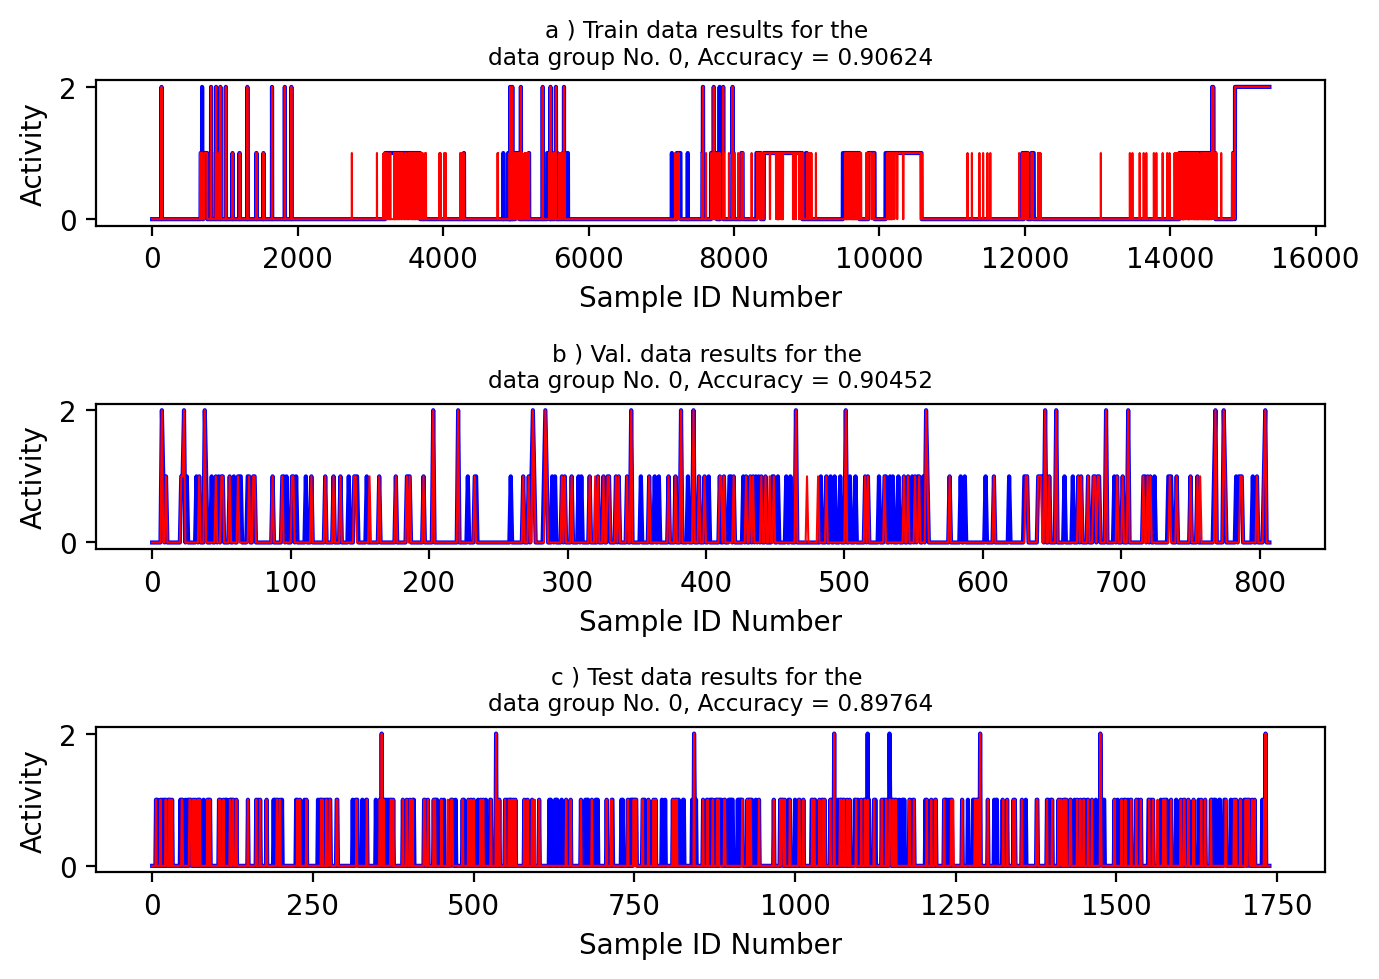

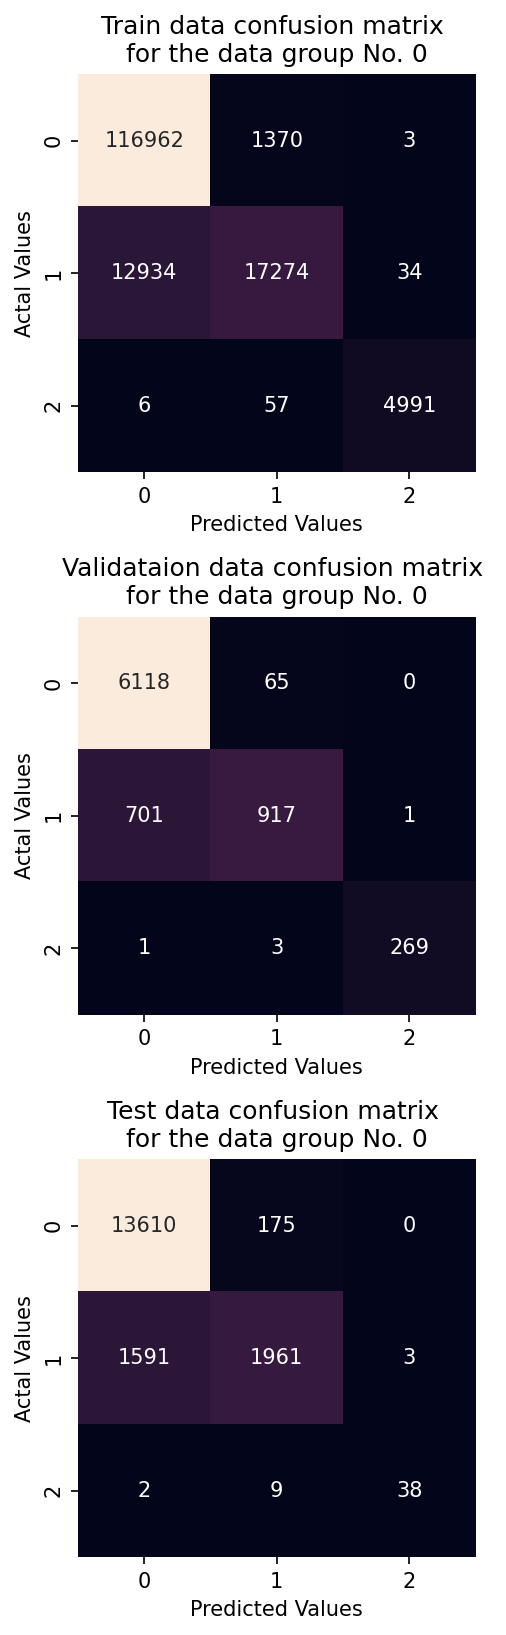

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1199/1201 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8711
Epoch 1: val_loss improved from inf to 0.32929, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm1.hdf5
1201/1201 [==============================] - 33s 27ms/step - loss: 0.3514 - accuracy: 0.8710 - val_loss: 0.3293 - val_accuracy: 0.8835
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3276 - accuracy: 0.8800
Epoch 2: val_loss improved from 0.32929 to 0.32425, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm1.hdf5
1201/1201 [==============================] - 33s 27ms/step - loss: 0.3275 - accuracy: 0.8800 - val_loss: 0.3243 - val_accuracy: 0.8825
Epoch 3/30
1199/1201 [============================>.] - ETA: 0s - loss: 0.3218 - accuracy: 0.8822
Epoch 3: val_loss did not improve from 0.32425
1201/1201 [==============================] - 32s 27ms/step - loss: 0.3218 - accuracy: 0.8822 - val_loss: 0.3324 - val_accuracy: 0

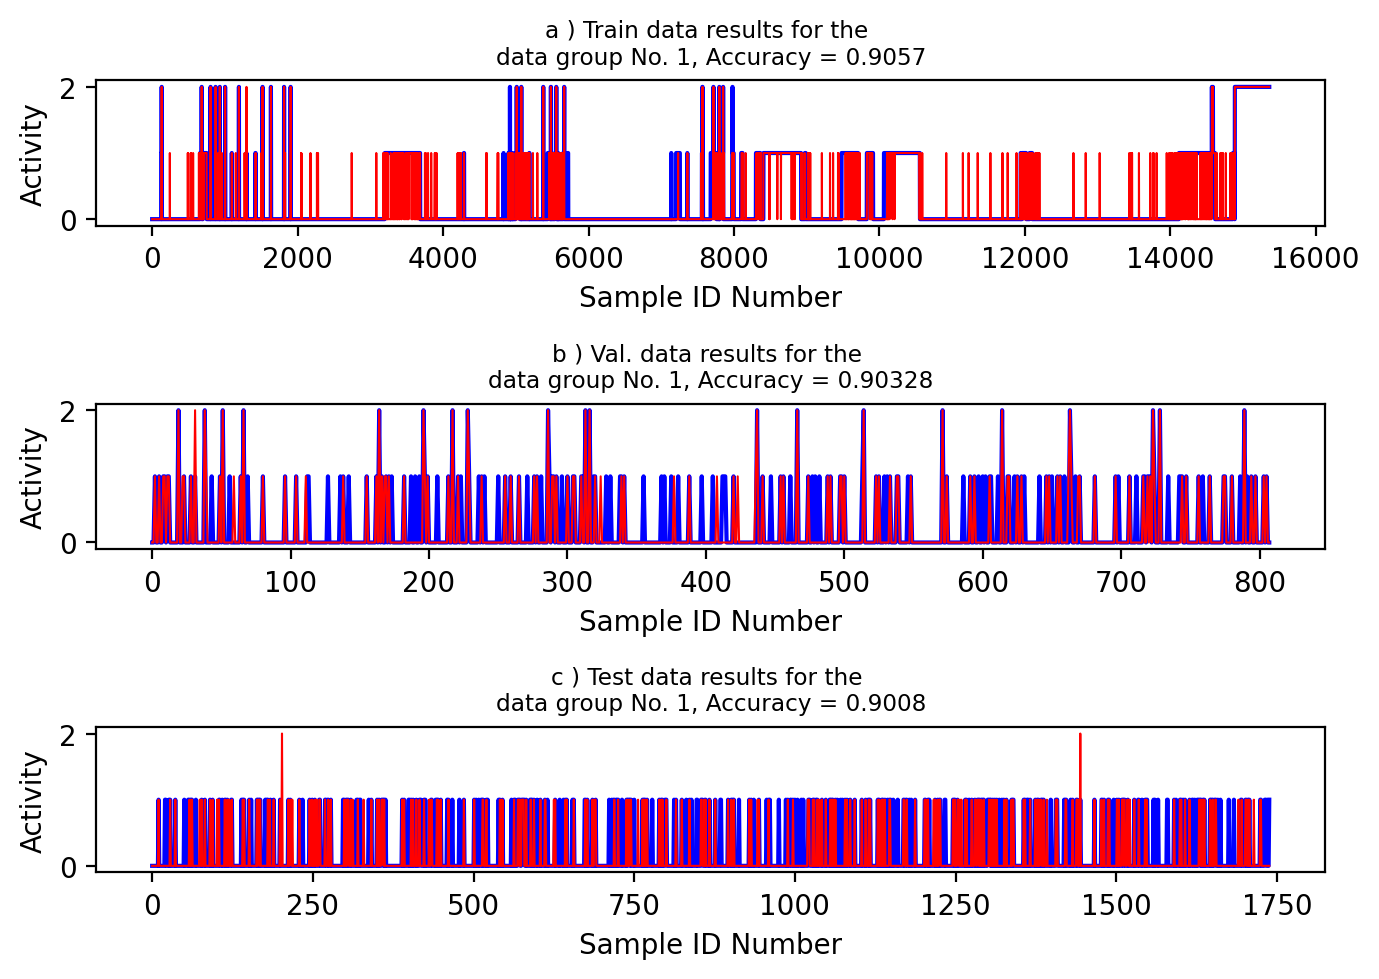

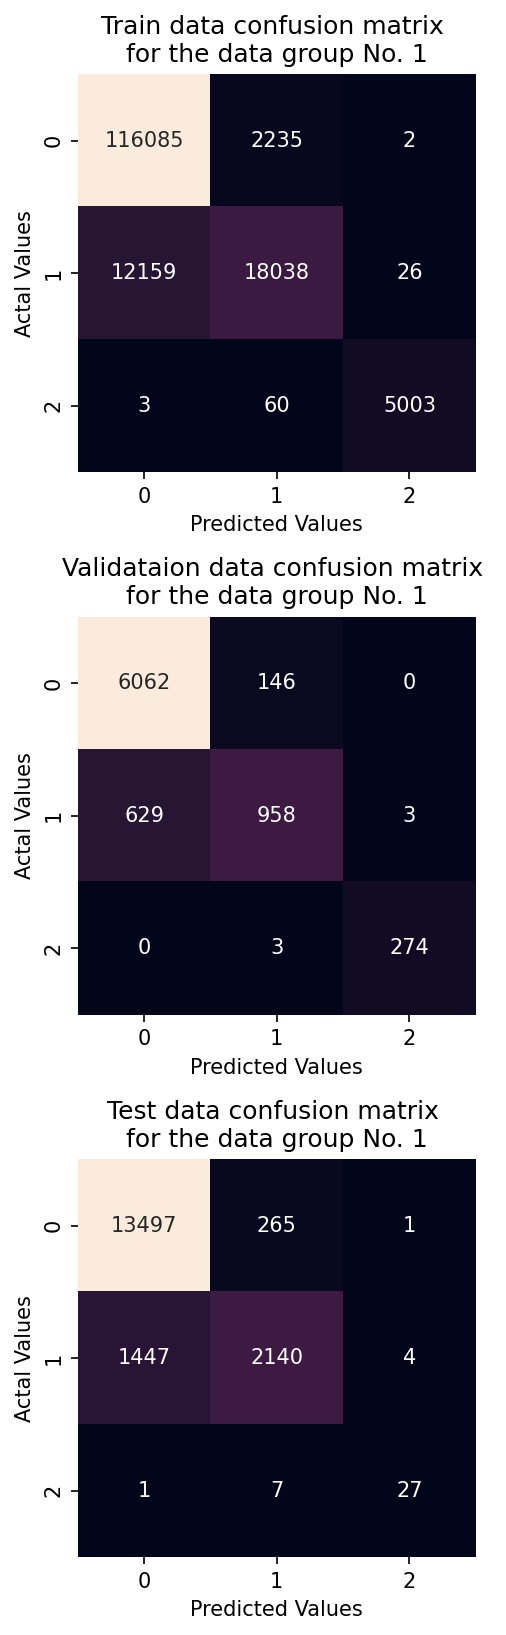

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3493 - accuracy: 0.8724
Epoch 1: val_loss improved from inf to 0.34511, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm2.hdf5
1201/1201 [==============================] - 35s 29ms/step - loss: 0.3493 - accuracy: 0.8724 - val_loss: 0.3451 - val_accuracy: 0.8728
Epoch 2/30
1199/1201 [============================>.] - ETA: 0s - loss: 0.3252 - accuracy: 0.8802
Epoch 2: val_loss improved from 0.34511 to 0.33629, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm2.hdf5
1201/1201 [==============================] - 34s 28ms/step - loss: 0.3252 - accuracy: 0.8802 - val_loss: 0.3363 - val_accuracy: 0.8778
Epoch 3/30
1199/1201 [============================>.] - ETA: 0s - loss: 0.3203 - accuracy: 0.8823
Epoch 3: val_loss did not improve from 0.33629
1201/1201 [==============================] - 34s 28ms/step - loss: 0.3204 - accuracy: 0.8823 - val_loss: 0.3440 - val_accuracy: 0

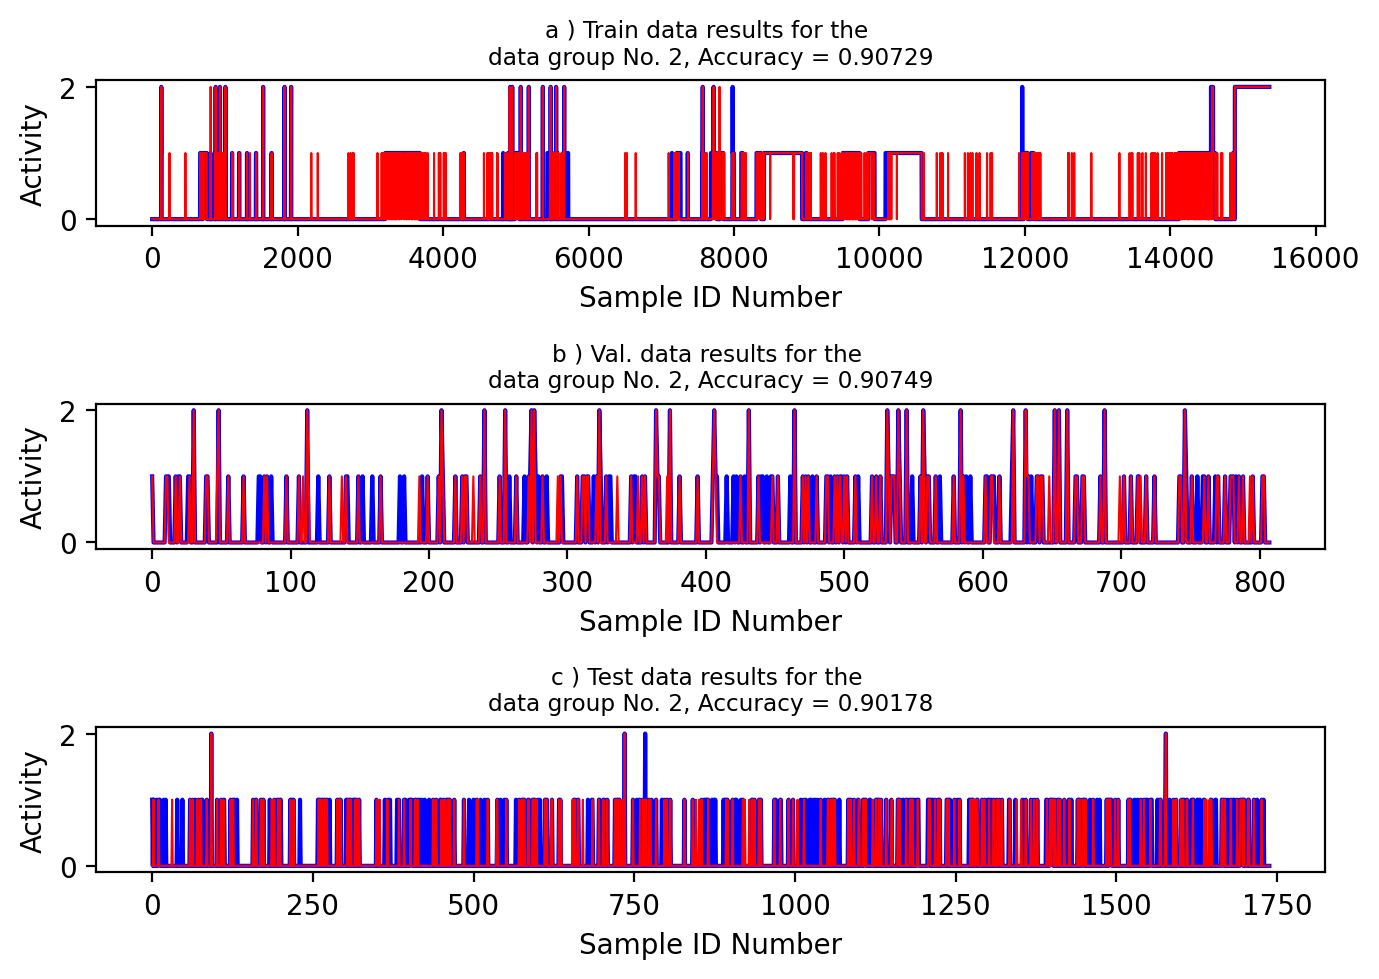

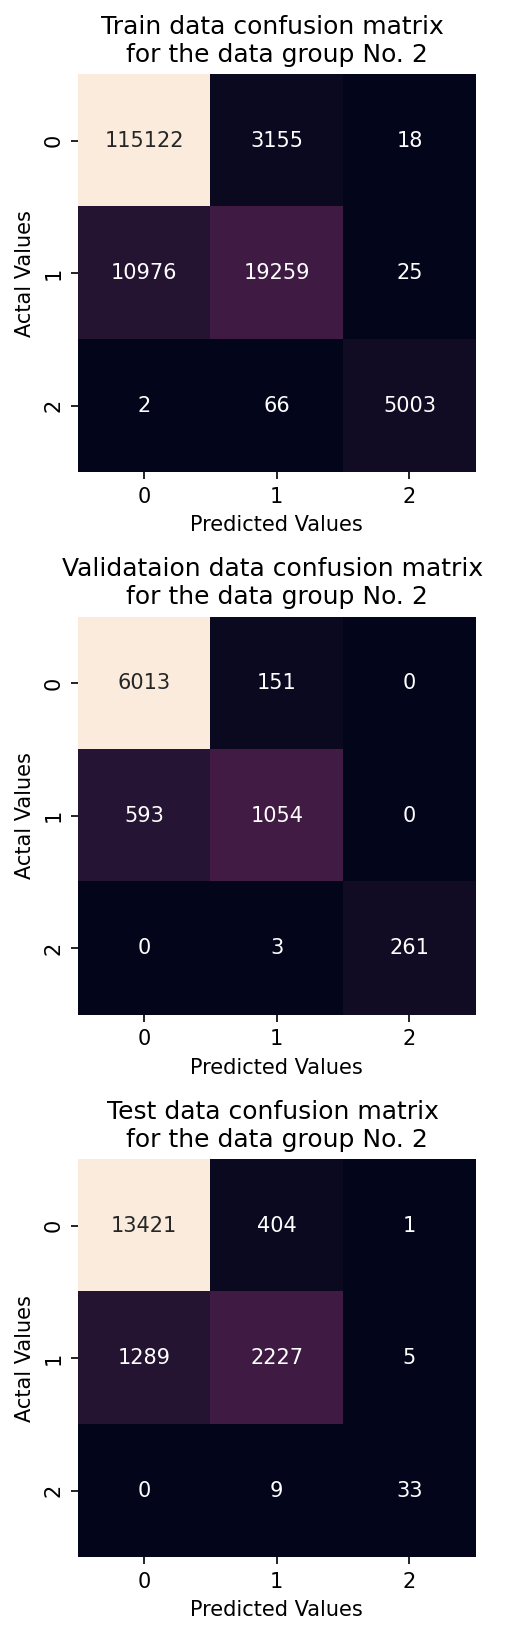

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3511 - accuracy: 0.8719
Epoch 1: val_loss improved from inf to 0.32018, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm3.hdf5
1201/1201 [==============================] - 36s 30ms/step - loss: 0.3511 - accuracy: 0.8719 - val_loss: 0.3202 - val_accuracy: 0.8806
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3285 - accuracy: 0.8798
Epoch 2: val_loss did not improve from 0.32018
1201/1201 [==============================] - 36s 30ms/step - loss: 0.3285 - accuracy: 0.8798 - val_loss: 0.3297 - val_accuracy: 0.8801
Epoch 3/30
1201/1201 [==============================] - ETA: 0s - loss: 0.3201 - accuracy: 0.8825
Epoch 3: val_loss improved from 0.32018 to 0.30651, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm3.hdf5
1201/1201 [==============================] - 36s 30ms/step - loss: 0.3201 - accuracy: 0.8825 - val_loss: 0.3065 - val_accuracy: 0

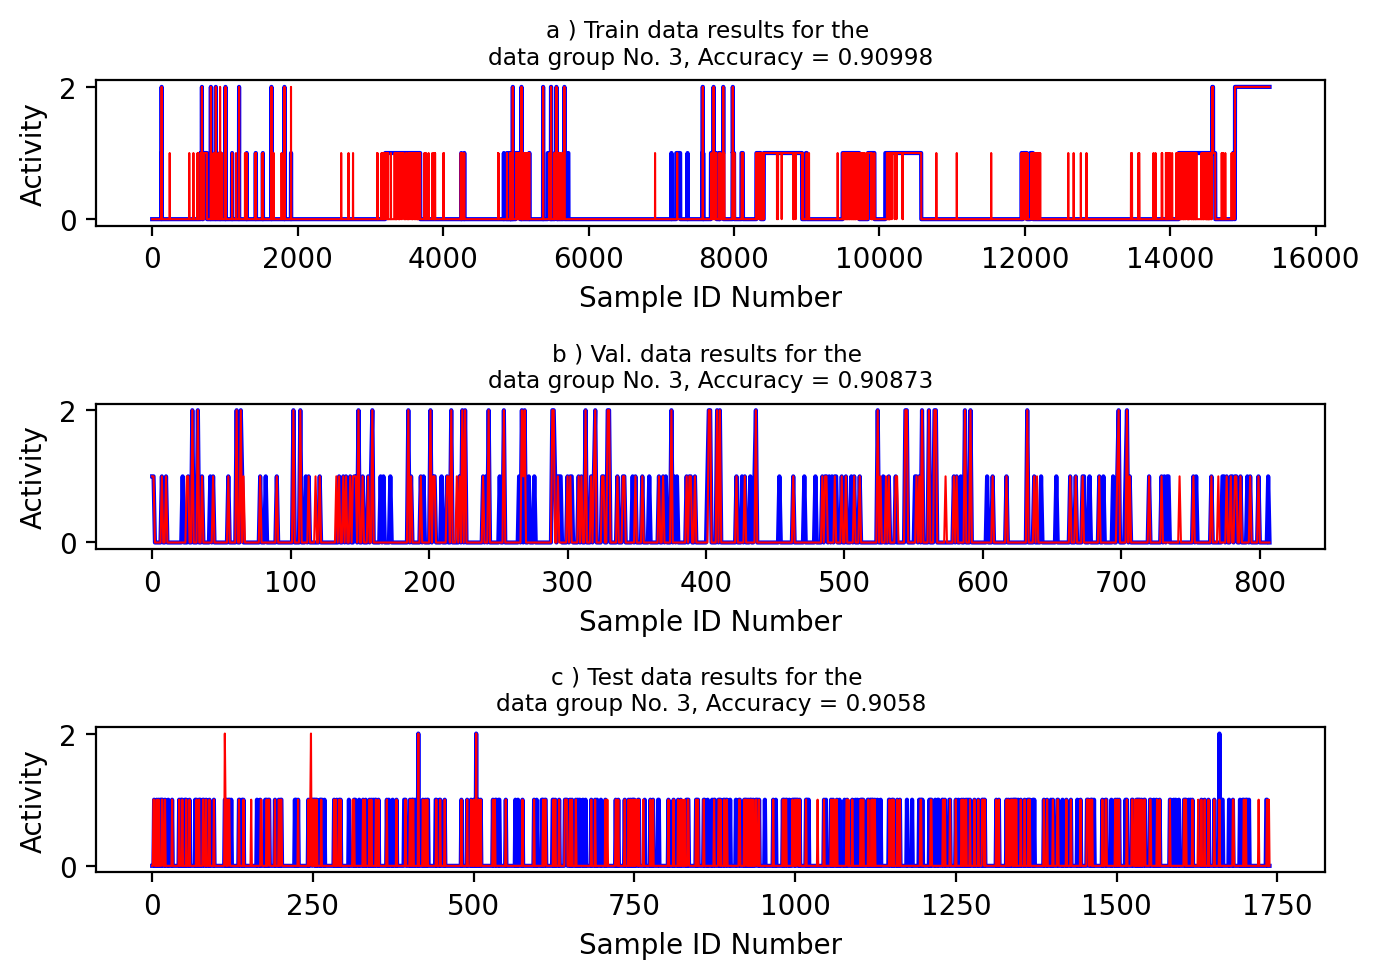

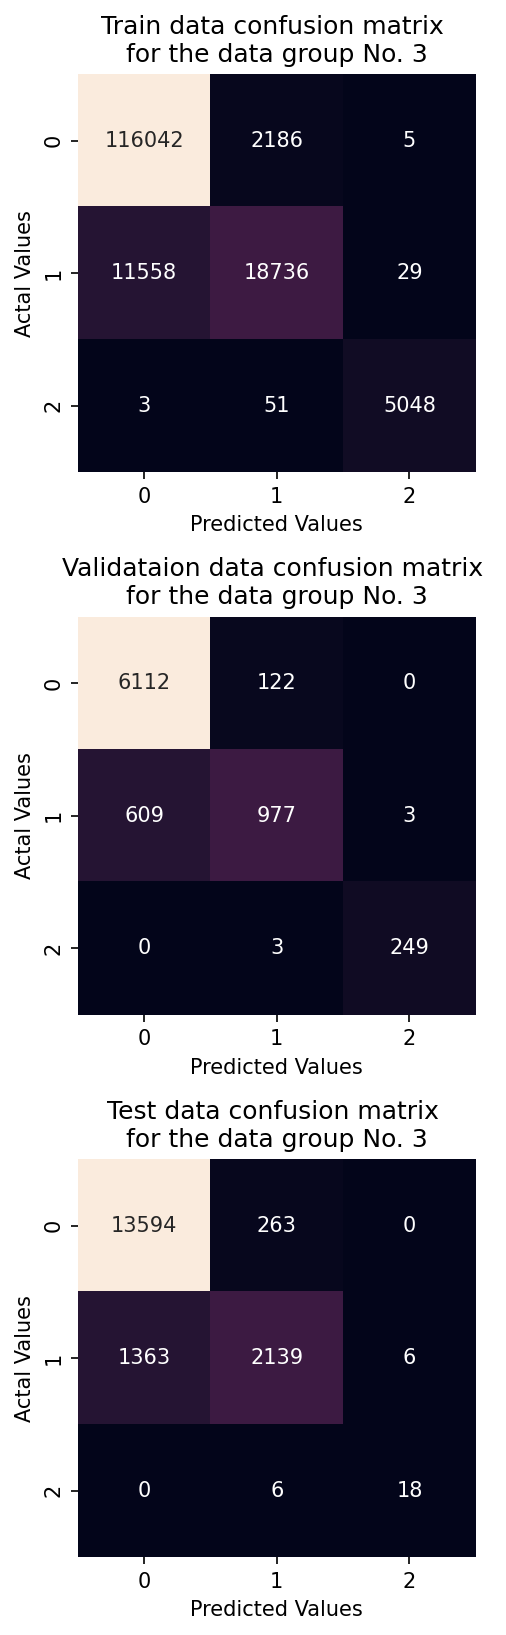

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3492 - accuracy: 0.8723
Epoch 1: val_loss improved from inf to 0.33297, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm4.hdf5
1201/1201 [==============================] - 38s 31ms/step - loss: 0.3492 - accuracy: 0.8724 - val_loss: 0.3330 - val_accuracy: 0.8816
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3270 - accuracy: 0.8796
Epoch 2: val_loss improved from 0.33297 to 0.31845, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm4.hdf5
1201/1201 [==============================] - 38s 31ms/step - loss: 0.3270 - accuracy: 0.8796 - val_loss: 0.3185 - val_accuracy: 0.8827
Epoch 3/30
1199/1201 [============================>.] - ETA: 0s - loss: 0.3205 - accuracy: 0.8826
Epoch 3: val_loss did not improve from 0.31845
1201/1201 [==============================] - 37s 31ms/step - loss: 0.3205 - accuracy: 0.8826 - val_loss: 0.3296 - val_accuracy: 0

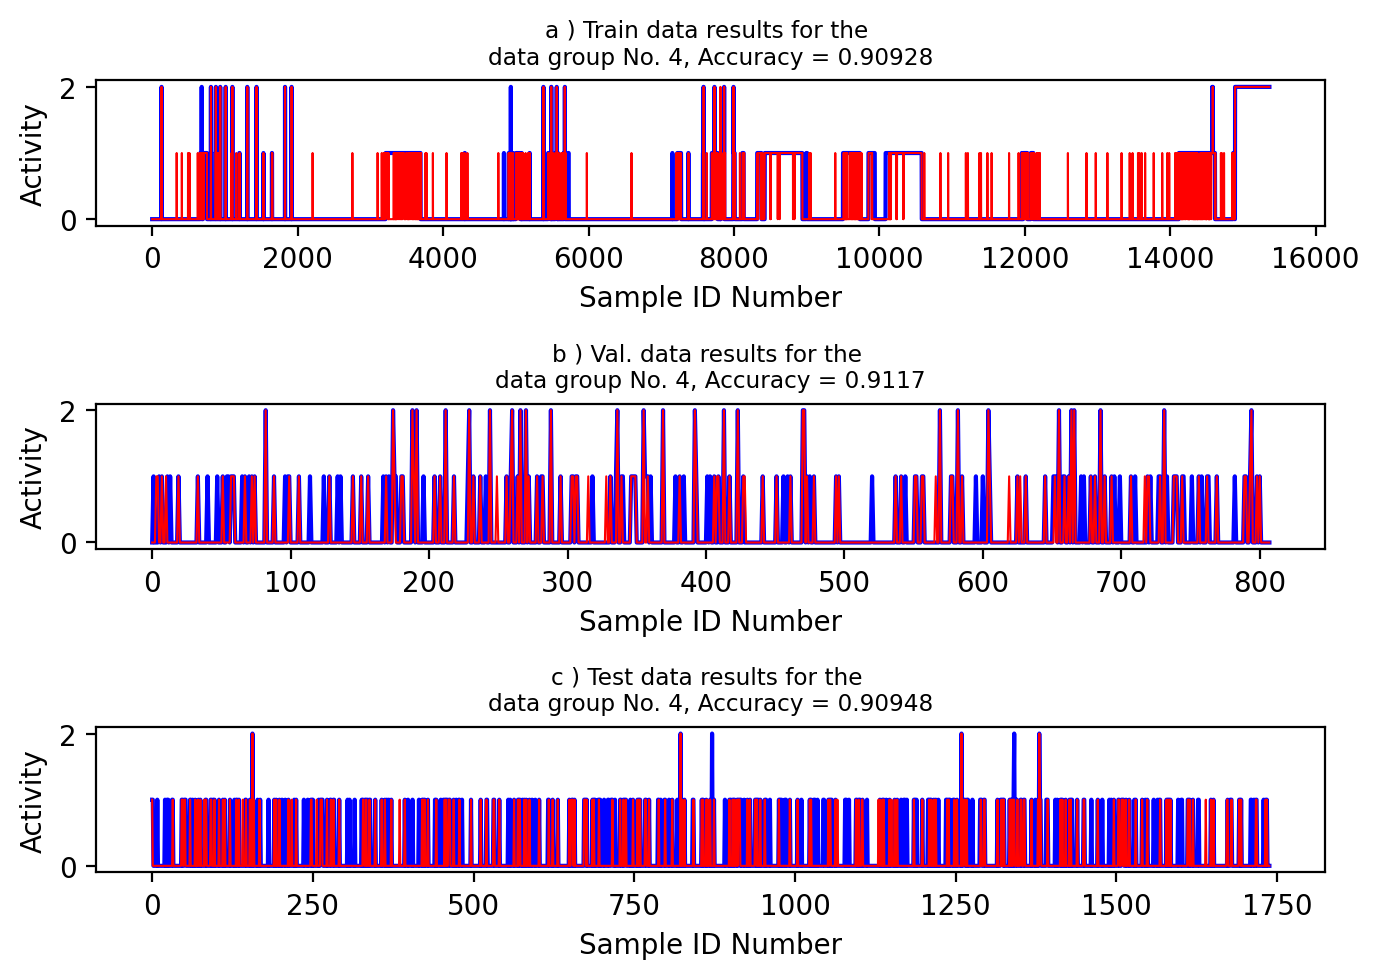

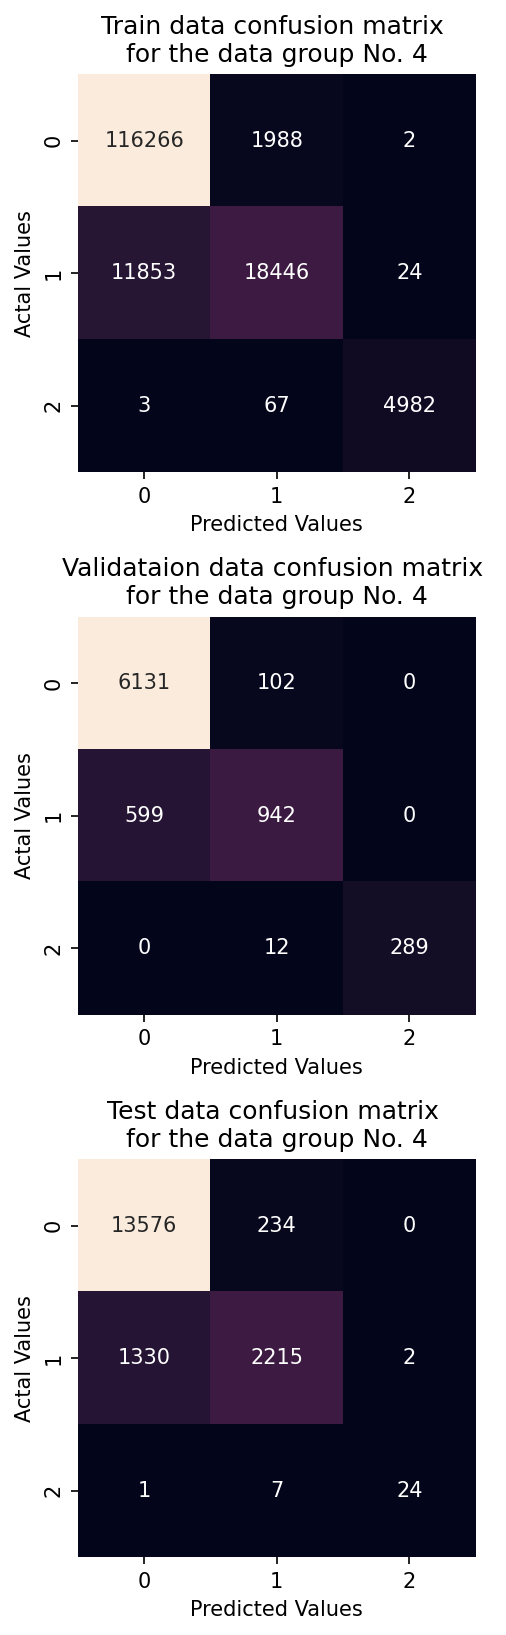

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3503 - accuracy: 0.8725
Epoch 1: val_loss improved from inf to 0.32477, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm5.hdf5
1201/1201 [==============================] - 40s 33ms/step - loss: 0.3504 - accuracy: 0.8724 - val_loss: 0.3248 - val_accuracy: 0.8812
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3261 - accuracy: 0.8805
Epoch 2: val_loss improved from 0.32477 to 0.31402, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm5.hdf5
1201/1201 [==============================] - 39s 32ms/step - loss: 0.3261 - accuracy: 0.8805 - val_loss: 0.3140 - val_accuracy: 0.8830
Epoch 3/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3209 - accuracy: 0.8827
Epoch 3: val_loss did not improve from 0.31402
1201/1201 [==============================] - 39s 32ms/step - loss: 0.3209 - accuracy: 0.8827 - val_loss: 0.3285 - val_accuracy: 0

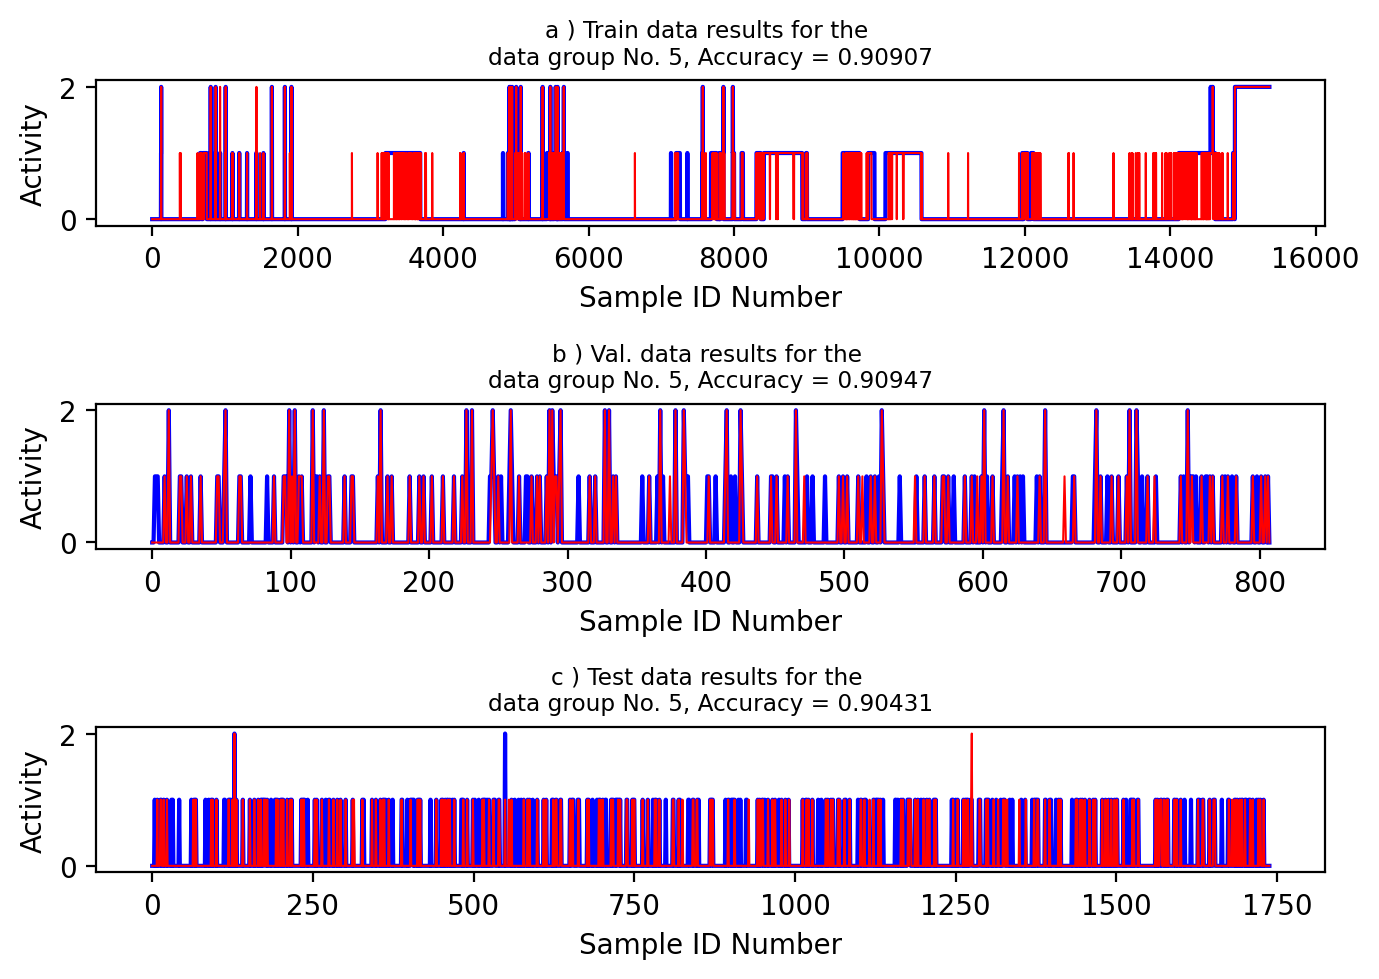

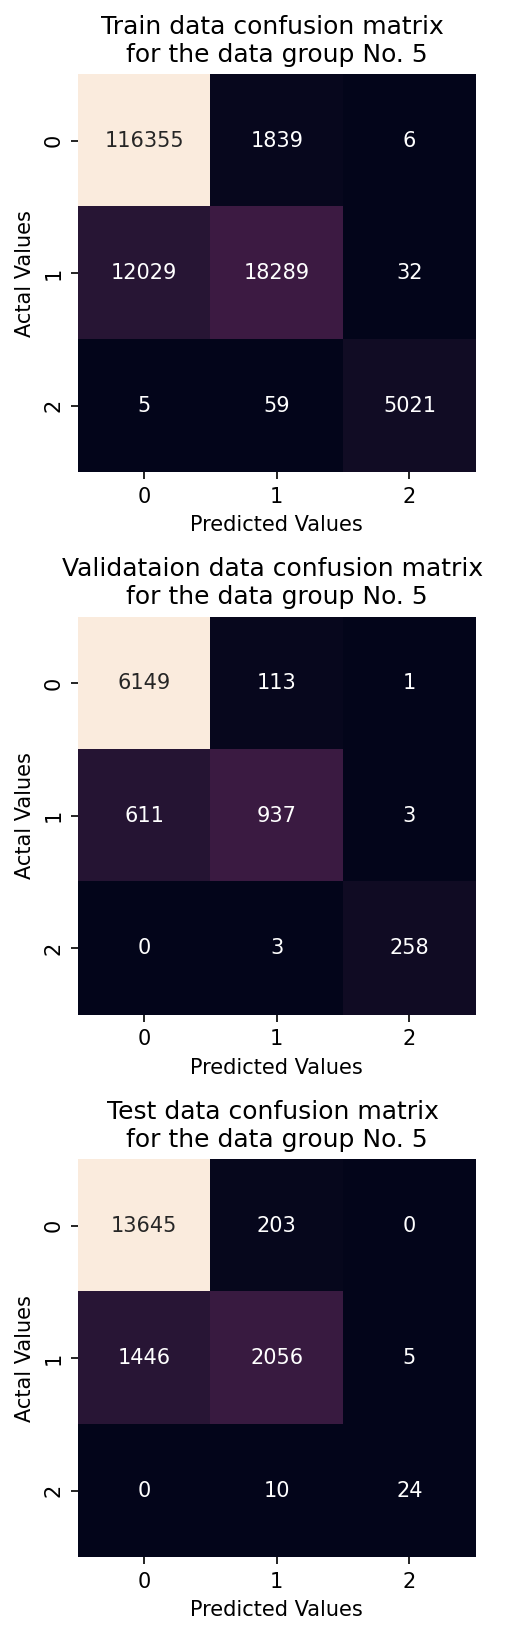

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1201/1201 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8718
Epoch 1: val_loss improved from inf to 0.33424, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm6.hdf5
1201/1201 [==============================] - 42s 35ms/step - loss: 0.3510 - accuracy: 0.8718 - val_loss: 0.3342 - val_accuracy: 0.8760
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3259 - accuracy: 0.8808
Epoch 2: val_loss improved from 0.33424 to 0.33391, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm6.hdf5
1201/1201 [==============================] - 41s 34ms/step - loss: 0.3259 - accuracy: 0.8808 - val_loss: 0.3339 - val_accuracy: 0.8693
Epoch 3/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3189 - accuracy: 0.8834
Epoch 3: val_loss improved from 0.33391 to 0.33040, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm6.hdf5
1201/1201 [==============================] -

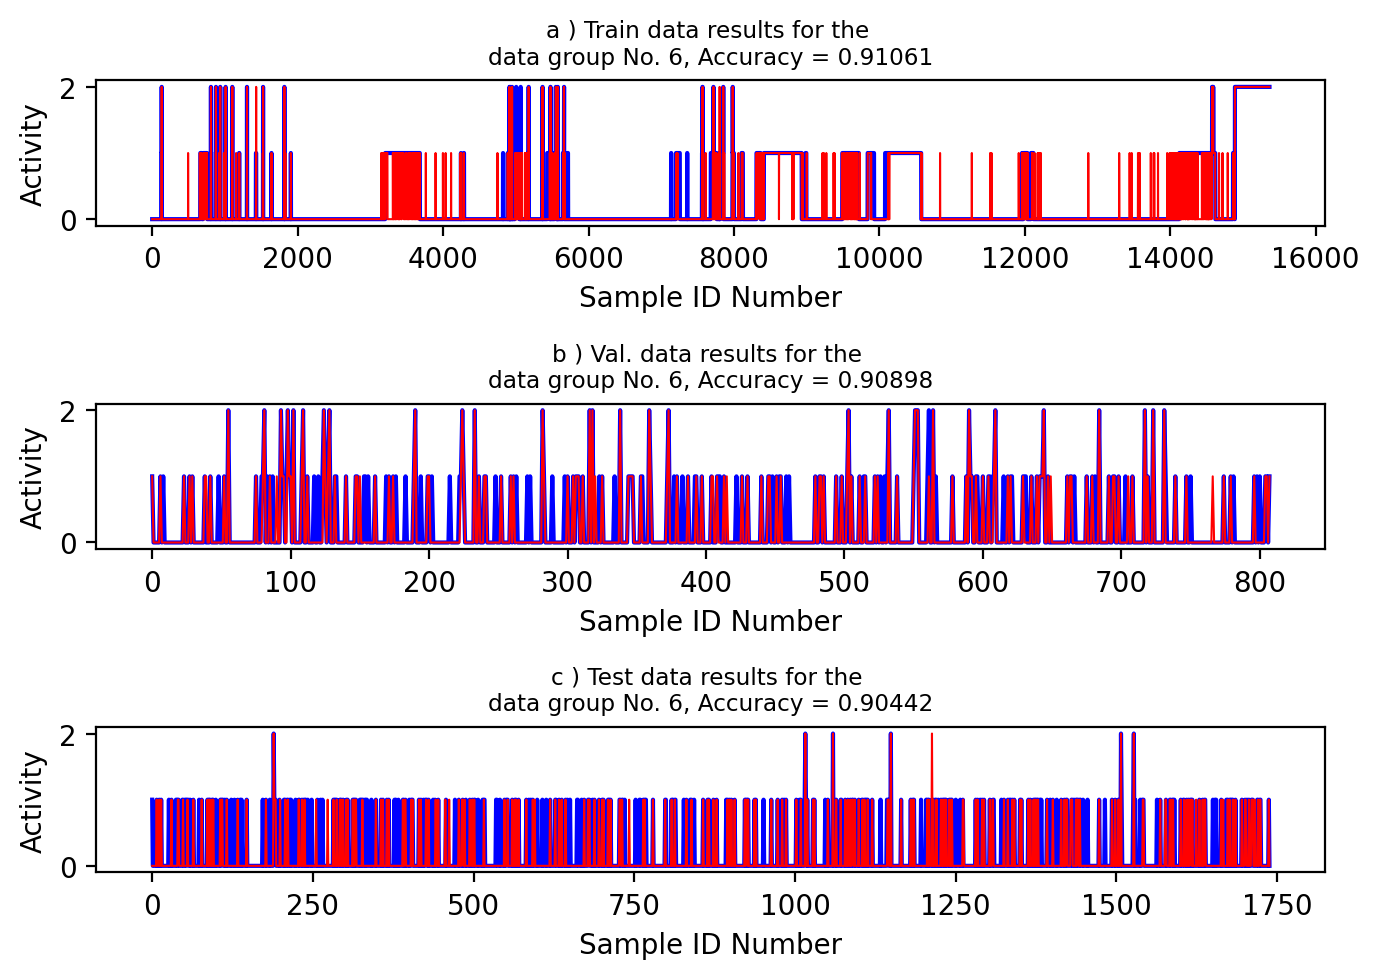

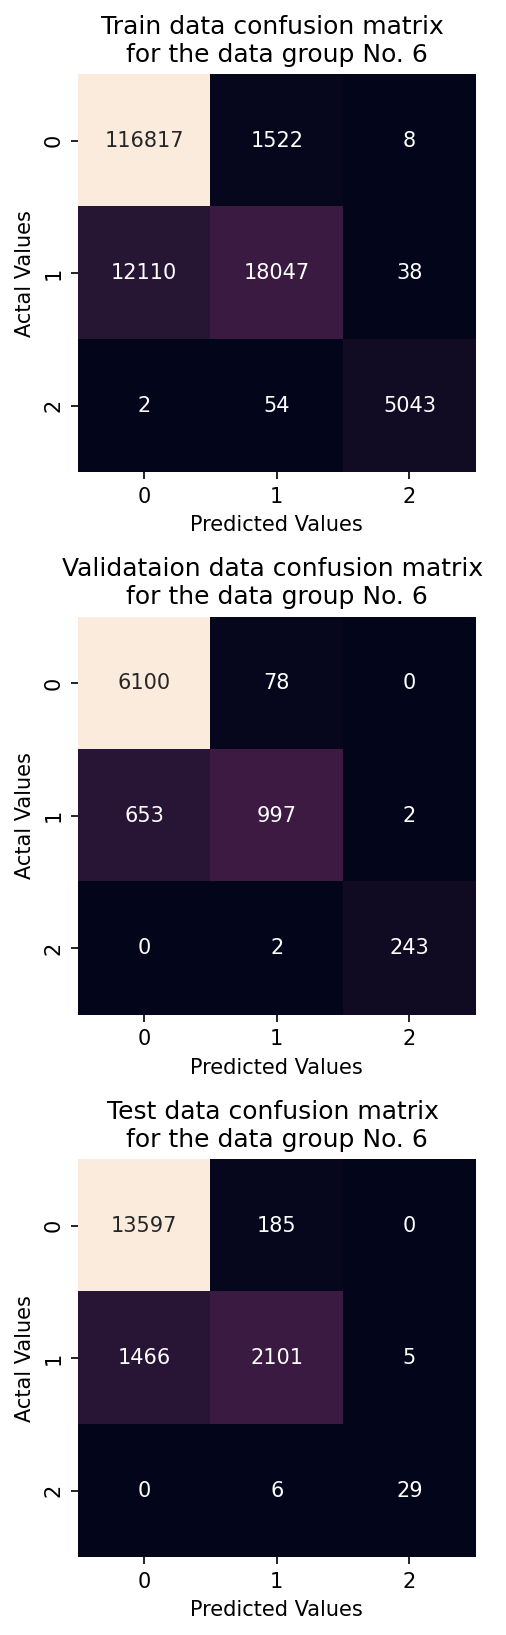

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1201/1201 [==============================] - ETA: 0s - loss: 0.3500 - accuracy: 0.8724
Epoch 1: val_loss improved from inf to 0.35332, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm7.hdf5
1201/1201 [==============================] - 41s 34ms/step - loss: 0.3500 - accuracy: 0.8724 - val_loss: 0.3533 - val_accuracy: 0.8741
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3276 - accuracy: 0.8801
Epoch 2: val_loss improved from 0.35332 to 0.32164, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm7.hdf5
1201/1201 [==============================] - 41s 34ms/step - loss: 0.3277 - accuracy: 0.8801 - val_loss: 0.3216 - val_accuracy: 0.8846
Epoch 3/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3201 - accuracy: 0.8826
Epoch 3: val_loss did not improve from 0.32164
1201/1201 [==============================] - 42s 35ms/step - loss: 0.3201 - accuracy: 0.8826 - val_loss: 0.3313 - val_accuracy: 0

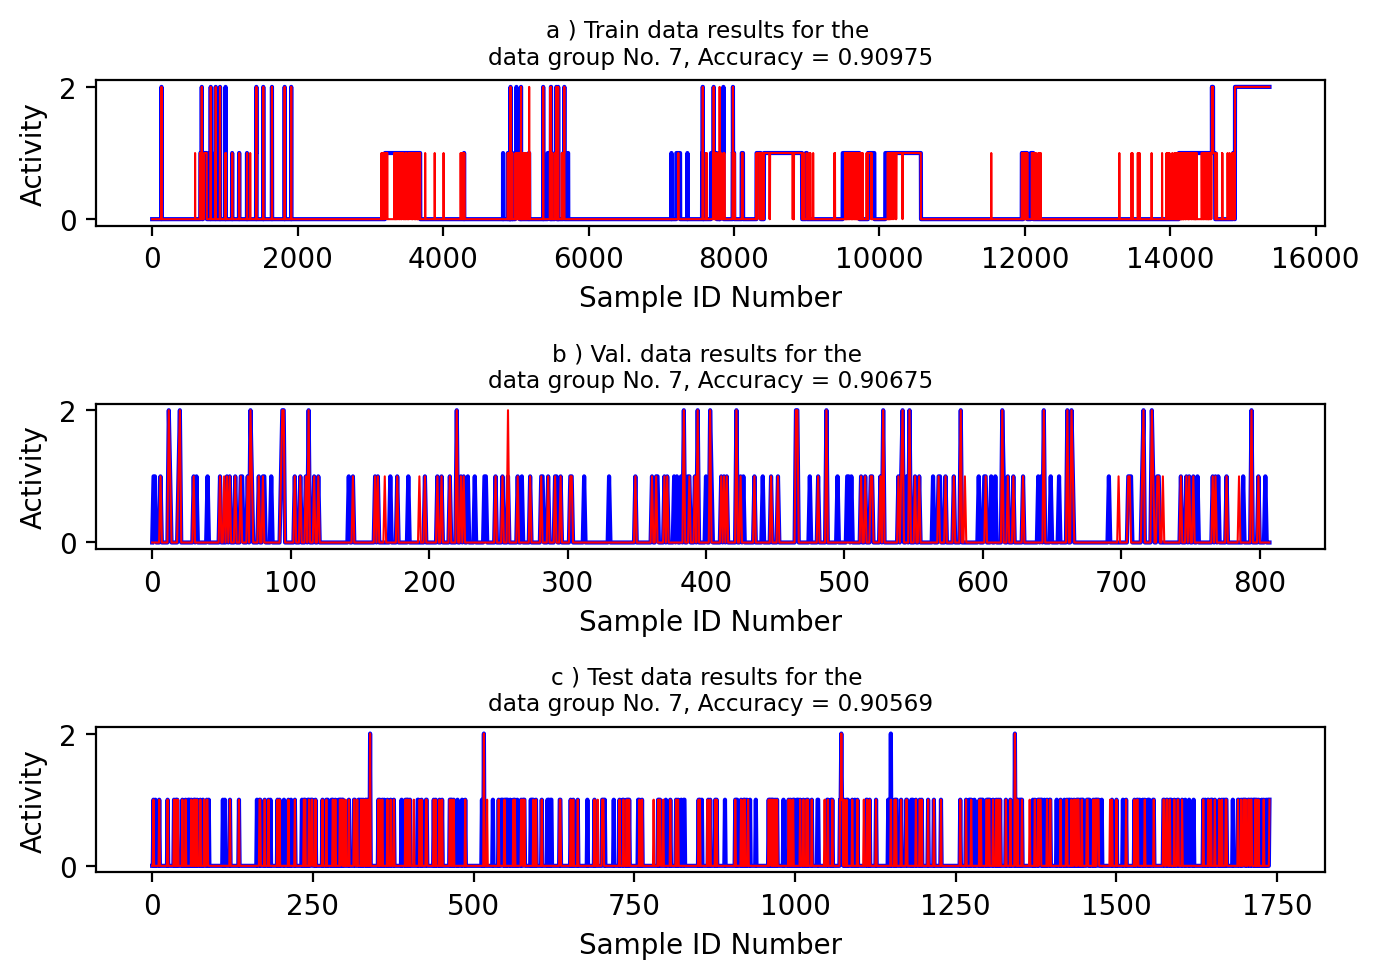

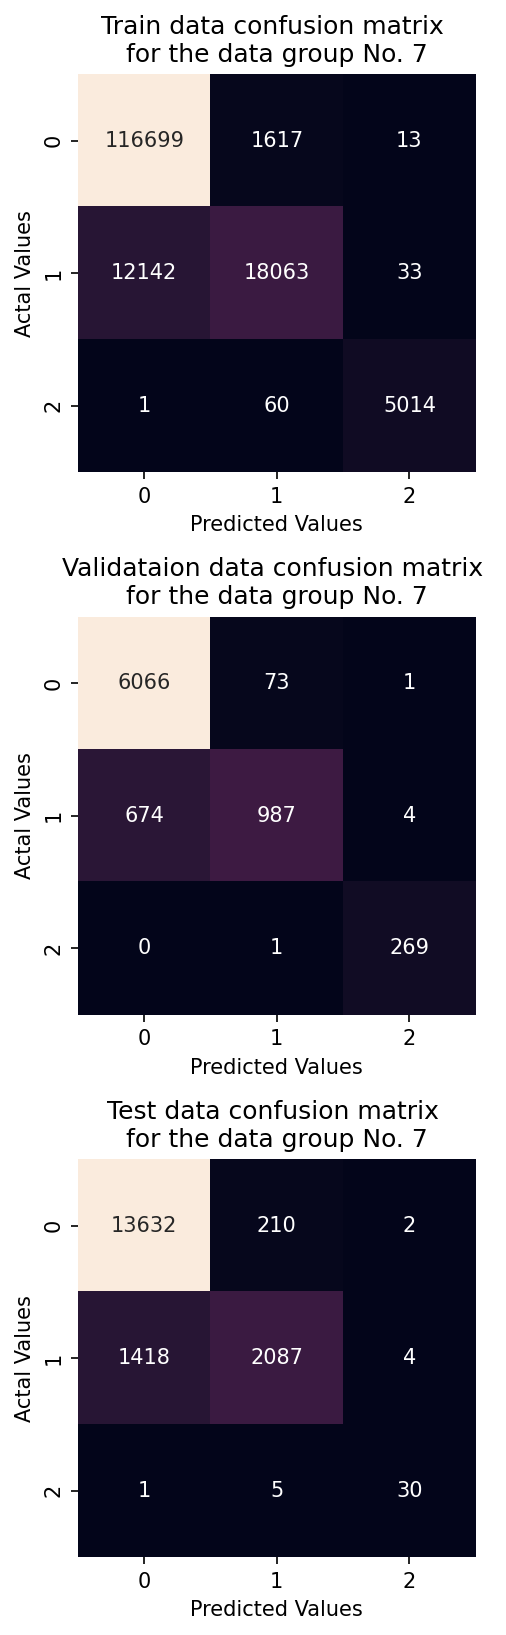

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1201/1201 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.8731
Epoch 1: val_loss improved from inf to 0.39407, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm8.hdf5
1201/1201 [==============================] - 44s 36ms/step - loss: 0.3478 - accuracy: 0.8731 - val_loss: 0.3941 - val_accuracy: 0.8554
Epoch 2/30
1201/1201 [==============================] - ETA: 0s - loss: 0.3245 - accuracy: 0.8813
Epoch 2: val_loss improved from 0.39407 to 0.33437, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm8.hdf5
1201/1201 [==============================] - 43s 36ms/step - loss: 0.3245 - accuracy: 0.8813 - val_loss: 0.3344 - val_accuracy: 0.8738
Epoch 3/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3178 - accuracy: 0.8840
Epoch 3: val_loss improved from 0.33437 to 0.32795, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm8.hdf5
1201/1201 [==============================] -

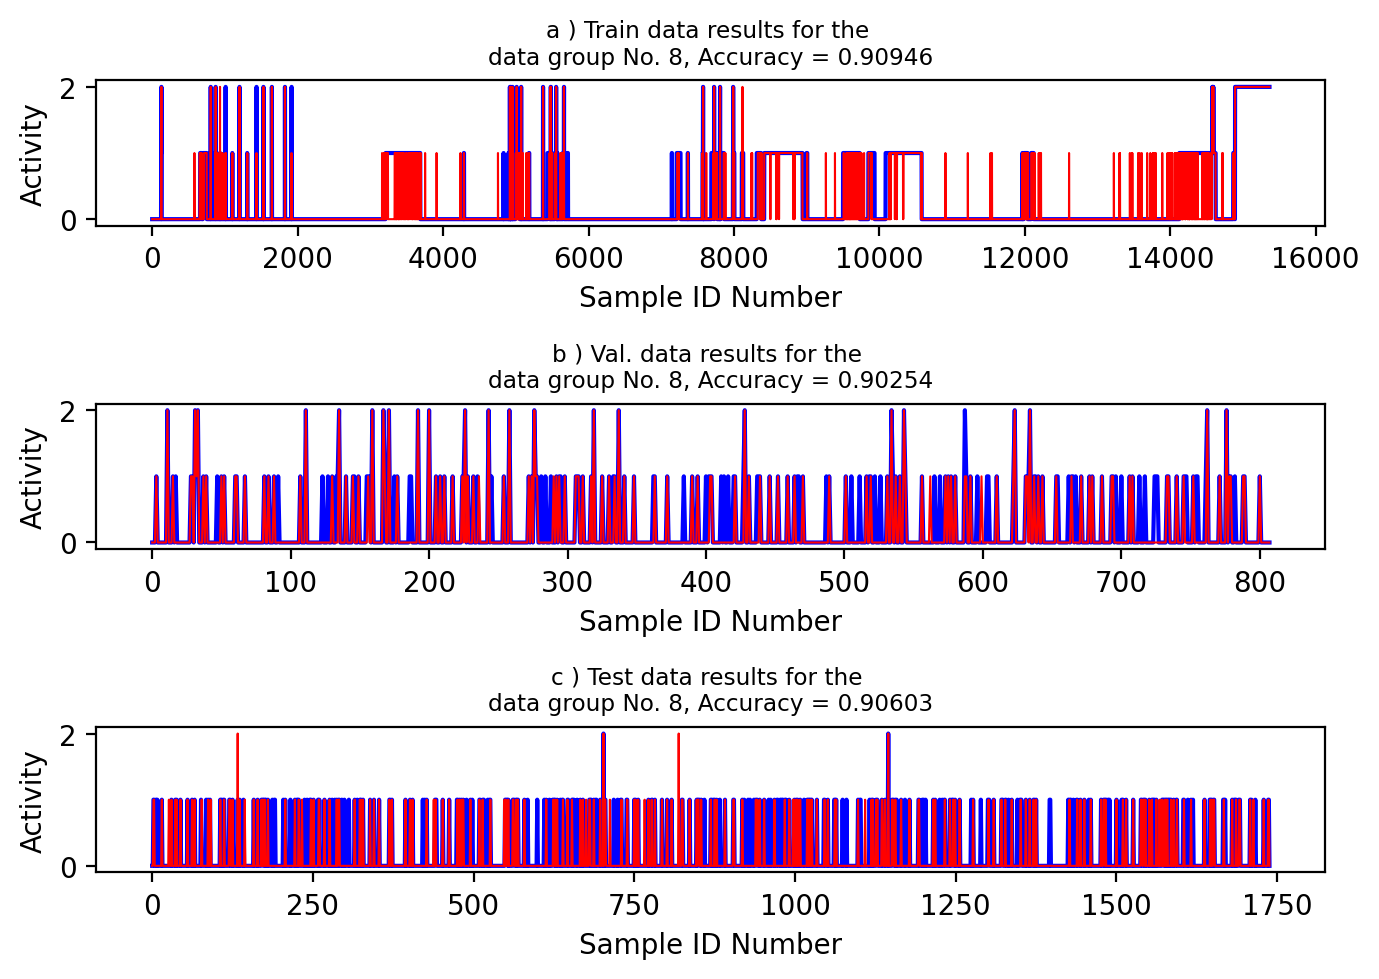

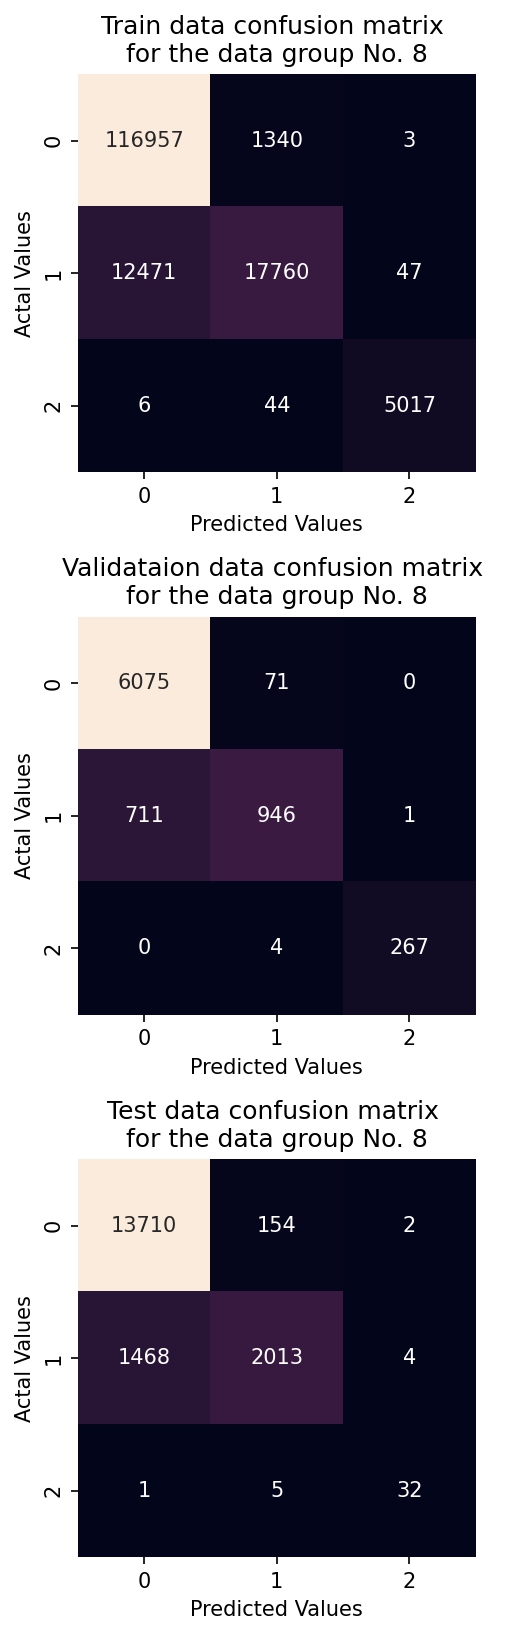

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3485 - accuracy: 0.8723
Epoch 1: val_loss improved from inf to 0.34477, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm9.hdf5
1201/1201 [==============================] - 45s 37ms/step - loss: 0.3485 - accuracy: 0.8723 - val_loss: 0.3448 - val_accuracy: 0.8760
Epoch 2/30
1200/1201 [============================>.] - ETA: 0s - loss: 0.3268 - accuracy: 0.8798
Epoch 2: val_loss improved from 0.34477 to 0.31476, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm9.hdf5
1201/1201 [==============================] - 43s 36ms/step - loss: 0.3268 - accuracy: 0.8798 - val_loss: 0.3148 - val_accuracy: 0.8832
Epoch 3/30
1201/1201 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.8824
Epoch 3: val_loss improved from 0.31476 to 0.31330, saving model to /content/drive/MyDrive/Colab Notebooks/leave_one_out/optm9.hdf5
1201/1201 [==============================] -

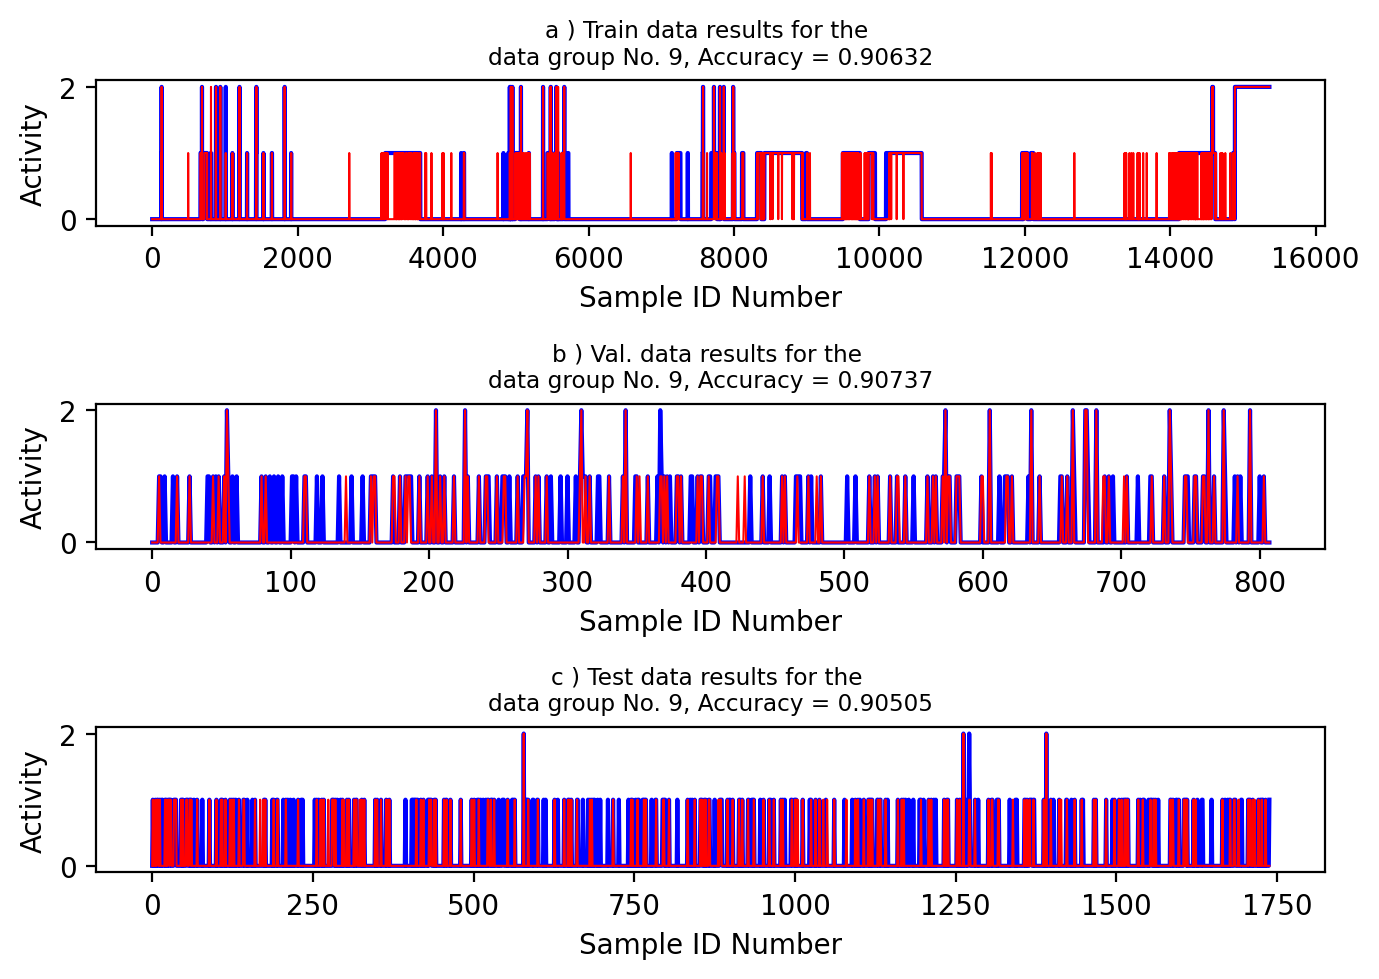

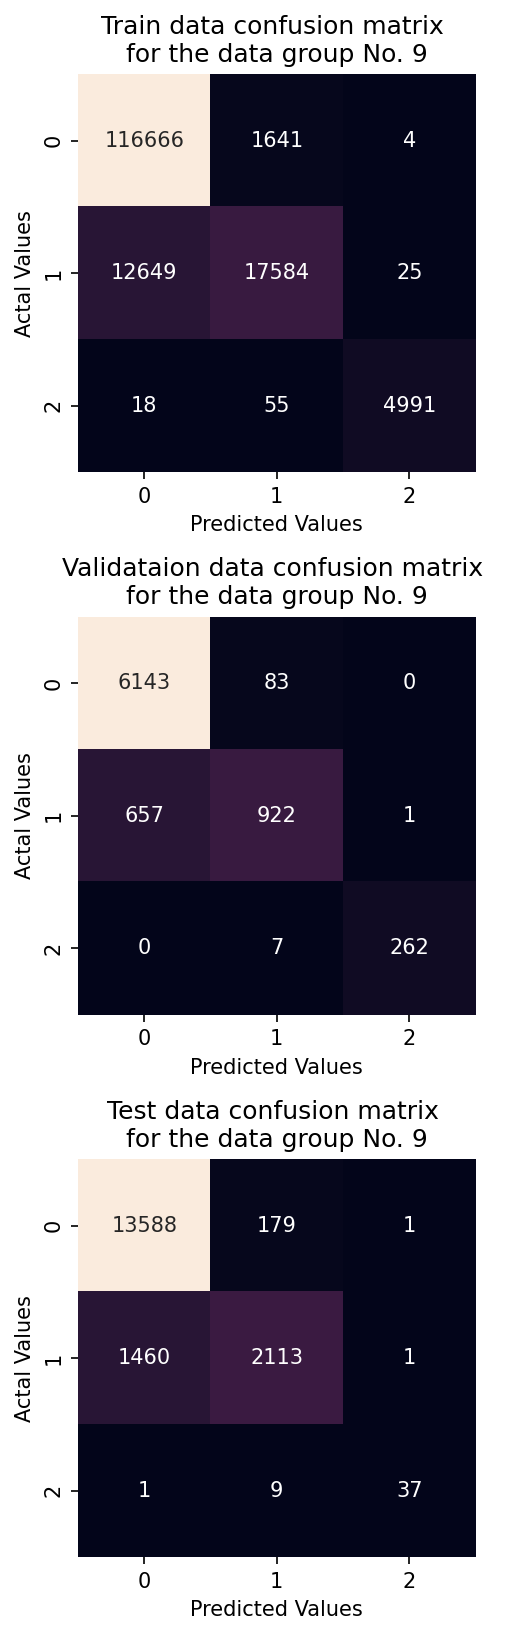

In [ ]:
cm =dict()   #confusion matrix
report = dict()  #precision and recall report
ks =  dict()   #kappa index
from collections import defaultdict
from keras.callbacks import ModelCheckpoint
import numpy as np

for key in dicdata:
  cm['%s'%key] = defaultdict(list)
  report['%s'%key] = defaultdict(list)
  ks['%s'%key] = defaultdict(list)
  # Extracting model input-targets from dicdata (dictionary which contains data instances)
  xtst = dicdata[key]['tstpred'].to_numpy()
  yts = dicdata[key]['tsttrgt'].to_numpy()
  xtrt = dicdata[key]['trnpred']
  ytr = dicdata[key]['trntrgt'].to_numpy()

  # Data augnebtaion for class to instances 
  xtrt['Activity'] = ytr
  aug2 = xtrt[xtrt['Activity']==2]
  naug2 = 5000
  outaug2 = dataug(aug2, "Activity", 2, naug2, 3, mode=1)
  xtrt = np.append(xtrt, outaug2.iloc[:,:].to_numpy(), axis=0 )
  ytr = np.append(ytr,np.ones((naug2,))*2, axis=0 )
  xtr = xtrt[:,:-1]
  xts = xtst[:,:-1]
  val_per = 5
  validx = np.random.randint(0, ytr.shape[0], size=int(ytr.shape[0]*(val_per*0.01)), dtype=int)
  xvl = xtr[validx,:]
  yvl = ytr[validx,]
  xtr = np.delete(xtr,validx, axis=0)
  ytr = np.delete(ytr,validx, axis=0)

  ytr = to_categorical(ytr)
  yts = to_categorical(yts)
  yvl = to_categorical(yvl)
  
  # Defining and compiling models
  filepath = '/content/drive/MyDrive/Colab Notebooks/leave_one_out/optm%s.hdf5'%key
  checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks = [checkpoint]
  model = Sequential()
  model.add(Dense(1024, activation='relu', input_dim=xtr.shape[1]))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
  history = model.fit(xtr, ytr,  epochs=30, validation_data = (xvl,yvl), batch_size=128, callbacks=callbacks, shuffle= True) #  

  import pickle
  with open('/content/drive/MyDrive/Colab Notebooks/leave_one_out/history%s.json'%key, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
  
  scores  = model.evaluate(xtr, ytr, verbose=0)
  scores1 = model.evaluate(xvl, yvl, verbose=0)
  scores2 = model.evaluate(xts, yts, verbose=0)
  # scores3 = model.evaluate(xep1, yep1, verbose=0)

  import matplotlib.pyplot as plt
  strd =10
  trnpredictions = model.predict(xtr)
  plt.figure(figsize=(7,5), dpi=200)
  plt.subplot(3, 1, 1)
  plt.plot(cat2lbl(ytr[0::strd,]),color='blue')
  plt.plot(cat2lbl(trnpredictions[0::strd,]),color='red', linewidth=0.75)
  # plt.legend(['Observations','Predictions'], loc=1, fontsize='small', ncol=1)
  a = 'a ) Train data results for the \ndata group No. %s, Accuracy = '%key + str( np.round(scores[1] , decimals =5))
  plt.title(a, fontsize='small')
  plt.xlabel('Sample ID Number')
  plt.ylabel('Activity')

  plt.subplot(3, 1, 2)
  valpredictions = model.predict(xvl)
  plt.plot(cat2lbl(yvl[0::strd,]),color='blue')
  plt.plot(cat2lbl(valpredictions[0::strd,]),color='red', linewidth=0.75)
  # plt.legend(['observations','Predictions'], loc=1, fontsize='medium', ncol=1)
  a = 'b ) Val. data results for the \ndata group No. %s, Accuracy = '%key + str( np.round(scores1[1] , decimals =5))
  plt.title(a, fontsize='small')
  plt.xlabel('Sample ID Number')
  plt.ylabel('Activity')
  plt.tight_layout()

  plt.subplot(3, 1, 3)
  tstpredictions = model.predict(xts)
  plt.plot(cat2lbl(yts[0::strd,]),color='blue')
  plt.plot(cat2lbl(tstpredictions[0::strd,]),color='red', linewidth=0.75)
  # plt.legend(['observations','Predictions'], loc=1, fontsize='medium', ncol=1)
  a = 'c ) Test data results for the \ndata group No. %s, Accuracy = '%key + str(np.round(scores2[1] , decimals =5))
  plt.title(a, fontsize='small')
  plt.xlabel('Sample ID Number')
  plt.ylabel('Activity')
  plt.tight_layout()

  from sklearn import metrics
  from sklearn.metrics import confusion_matrix 
  import seaborn as sns
  from sklearn.metrics import confusion_matrix, cohen_kappa_score

  plt.figure(figsize=(4,11), dpi=150)
  plt.subplot(311)
  matrix_confusiontr = confusion_matrix(cat2lbl(ytr), cat2lbl(trnpredictions))
  sns.heatmap(matrix_confusiontr, square=True, annot=True, fmt='d', cbar=False)
  plt.title('Train data confusion matrix \nfor the data group No. %s'%key)
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')

  plt.subplot(312)
  matrix_confusionvl = confusion_matrix(cat2lbl(yvl), cat2lbl(valpredictions))
  sns.heatmap(matrix_confusionvl, square=True, annot=True, fmt='d', cbar=False)
  plt.title('Validataion data confusion matrix \nfor the data group No. %s'%key)
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')

  plt.subplot(313)
  matrix_confusionts = confusion_matrix(cat2lbl(yts), cat2lbl(tstpredictions))
  sns.heatmap(matrix_confusionts, square=True, annot=True, fmt='d', cbar=False)
  plt.title('Test data confusion matrix \nfor the data group No. %s'%key)
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')

  plt.tight_layout()
  plt.show()

  cm['%s'%key]['tr'] = matrix_confusiontr
  cm['%s'%key]['vl'] = matrix_confusionvl
  cm['%s'%key]['ts'] = matrix_confusionts

  trr = metrics.classification_report(cat2lbl(ytr), cat2lbl(trnpredictions), digits=3)
  vlr = metrics.classification_report(cat2lbl(yvl), cat2lbl(valpredictions), digits=3)
  tsr = metrics.classification_report(cat2lbl(yts), cat2lbl(tstpredictions), digits=3)
  report['%s'%key]['tr'] = trr
  report['%s'%key]['vl'] = vlr
  report['%s'%key]['ts'] = tsr

  ks['%s'%key]['tr'] = cohen_kappa_score(cat2lbl(ytr), cat2lbl(trnpredictions))
  ks['%s'%key]['vl'] = cohen_kappa_score(cat2lbl(yvl), cat2lbl(valpredictions))
  ks['%s'%key]['ts'] = cohen_kappa_score(cat2lbl(yts), cat2lbl(tstpredictions))


filename = "/content/drive/MyDrive/Colab Notebooks/leave_one_out/Conf_mat.pkl"
with open(filename, 'wb') as f:
    pickle.dump(cm, f)

filename = "/content/drive/MyDrive/Colab Notebooks/leave_one_out/report.pkl"
with open(filename, 'wb') as f:
    pickle.dump(report, f)

filename = "/content/drive/MyDrive/Colab Notebooks/leave_one_out/ckappas.pkl"
with open(filename, 'wb') as f:
    pickle.dump(ks, f)

In [ ]:
sum=np.ndarray(list([]))

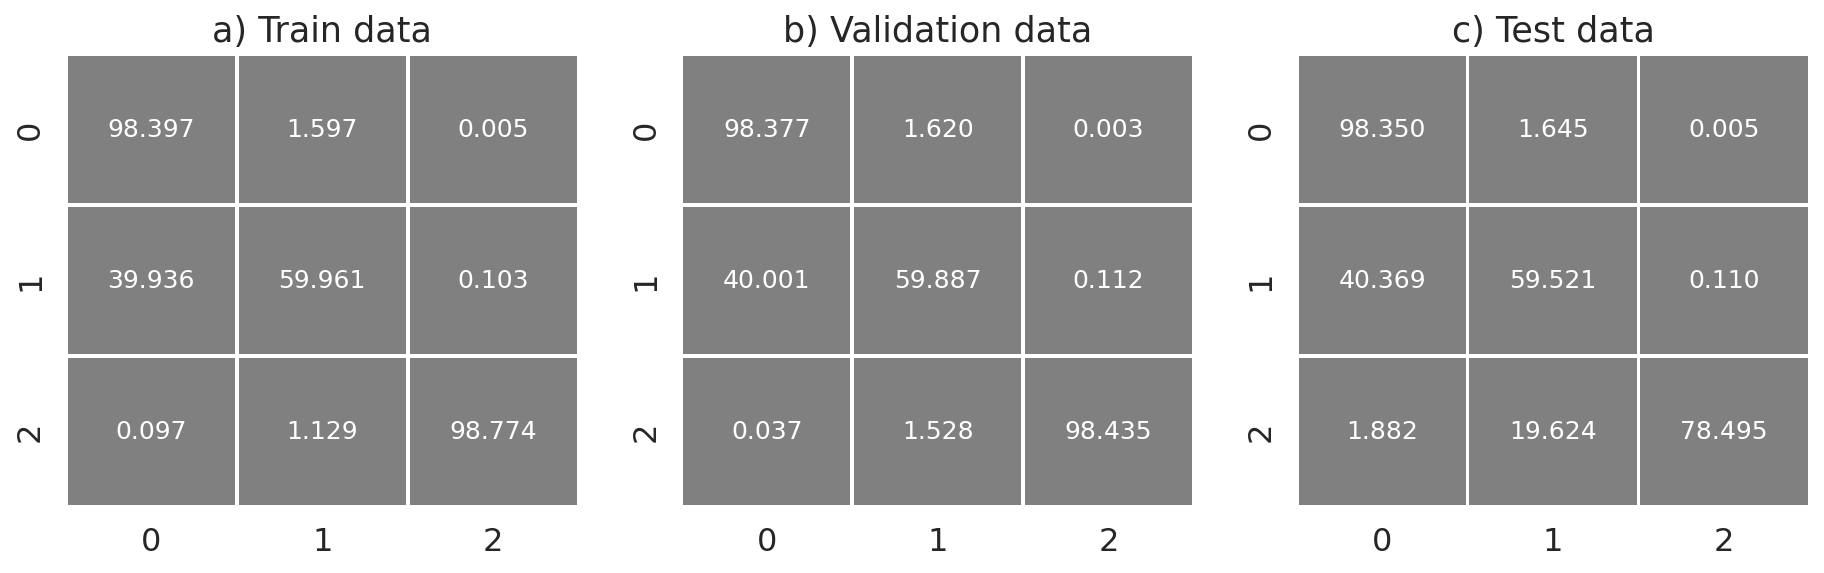

In [ ]:
import pickle
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
filename = "/content/drive/MyDrive/Colab Notebooks/leave_one_out/Conf_mat.pkl"
with open(filename, 'rb') as f:
    reportmetrics = pickle.load(f)
avtr, avvl, avts = np.ndarray(list([])),  np.ndarray(list([])),  np.ndarray(list([]))     
for key in reportmetrics.keys():
  for lbl in reportmetrics[key]:
    # print(key,'==>',lbl, '\n', reportmetrics[key][lbl])

    if lbl=="tr":
      avtr=avtr+reportmetrics[key][lbl]/10
    if lbl=="vl":
      avvl=avvl+reportmetrics[key][lbl]/10
    if lbl=="ts":
      avts=avts+reportmetrics[key][lbl]/10 
avtrs = np.array([100*avtr[0,:]/sum(avtr[0,:]), 100*avtr[1,:]/sum(avtr[1,:]), 100*avtr[2,:]/sum(avtr[2,:])])
avvls = np.array([100*avvl[0,:]/sum(avvl[0,:]), 100*avvl[1,:]/sum(avvl[1,:]), 100*avvl[2,:]/sum(avvl[2,:])])
avtss = np.array([100*avts[0,:]/sum(avts[0,:]), 100*avts[1,:]/sum(avts[1,:]), 100*avts[2,:]/sum(avts[2,:])])


plt.figure(figsize=(15,4), dpi=150)
sn.set(font_scale=1.4)

array = avtrs
df_cm = pd.DataFrame(array, range(3), range(3))
plt.subplot(131)
plt.title("a) Train data")
with sn.axes_style('darkgrid'):
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, fmt=".3f", cmap=ListedColormap(['gray']), linewidths=1.3)

array = avvls
df_cm = pd.DataFrame(array, range(3), range(3))
plt.subplot(132)
plt.title("b) Validation data")
with sn.axes_style('darkgrid'):
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, fmt=".3f", cmap=ListedColormap(['gray']), linewidths=1.3)

array = avtss
df_cm = pd.DataFrame(array, range(3), range(3))
plt.subplot(133)
plt.title("c) Test data")
with sn.axes_style('darkgrid'):
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, fmt=".3f", cmap=ListedColormap(['gray']), linewidths=1.3)
plt.show()
# avtr.astype(int), avvl.astype(int), avts.astype(int)

In [ ]:
print(avtrs/10)

[[9.8397e+01 1.5970e+00 5.0000e-03]
 [3.9936e+01 5.9961e+01 1.0300e-01]
 [9.7000e-02 1.1290e+00 9.8774e+01]]


In [ ]:
import pickle
filename = "/content/drive/MyDrive/Colab Notebooks/leave_one_out/report.pkl"
with open(filename, 'rb') as f:
    conf_mat = pickle.load(f)  
p0 = []
p1 = [] 
p2 = []
r0, r1, r2 = [], [], []
f1_0, f1_1, f1_2 = [], [], []
for key in conf_mat.keys():
  for lbl in conf_mat[key]:
    print(key, "==>", lbl, "==>", "\n", conf_mat[key][lbl])
    rep = conf_mat[key][lbl]
    c0 = rep.split("         0      ")
    c1 = rep.split("         1      ")
    c2 = rep.split("         2      ")

    p0.append(float(c0[1][0:5]))
    p1.append(float(c1[1][0:5]))
    p2.append(float(c2[1][0:5]))
    
    r0.append(float(c0[1][11:16]))
    r1.append(float(c1[1][11:16]))
    r2.append(float(c2[1][11:16]))

    f1_0.append(float(c0[1][21:26]))
    f1_1.append(float(c1[1][21:26]))
    f1_2.append(float(c2[1][21:26]))



avp0 = sum(p0) / len(p0) 
avp1 = sum(p1) / len(p1) 
avp2 = sum(p2) / len(p2) 

avr0 = sum(r0) / len(r0) 
avr1 = sum(r1) / len(r1) 
avr2 = sum(r2) / len(r2) 

avf0 = sum(f1_0) / len(f1_0) 
avf1 = sum(f1_1) / len(f1_1) 
avf2 = sum(f1_2) / len(f1_2) 

print(avp0, avp1, avp2,'\n', avr0, avr1, avr2,'\n', avf0, avf1, avf2 )


In [ ]:
print(avp0, avp1, avp2,'\n', avr0, avr1, avr2,'\n', avf0, avf1, avf2 )


0.9050333333333331 0.9027999999999999 0.9480999999999998 
 0.9836999999999997 0.5979666666666666 0.9185 
 0.9428333333333333 0.7188666666666668 0.932233333333333


Text(0, 0.5, 'Kappa Statistic')

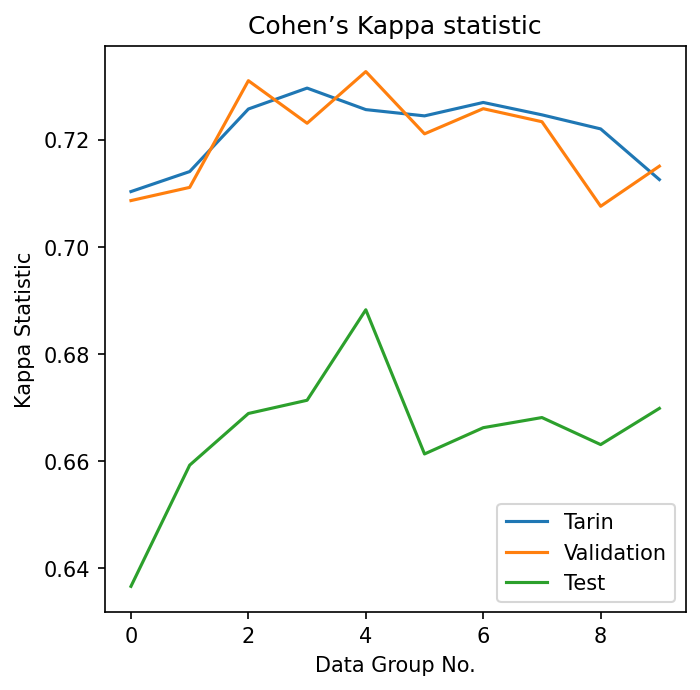

In [ ]:
import pickle        
filename = "/content/drive/MyDrive/Colab Notebooks/leave_one_out/ckappas.pkl"

with open(filename, 'rb') as f:
    kappa = pickle.load(f)
ktr = []
kvl = [] 
kts = []
for key in kappa.keys():
  for lbl in kappa[key]:
    # print(key, "==>", lbl, "==>", "\n", kappa[key][lbl])
    if lbl == "tr":
      ktr.append( kappa[key][lbl])
    if lbl == "vl":
      kvl.append( kappa[key][lbl])
    if lbl == "ts":
      kts.append( kappa[key][lbl])
aktr =  sum(ktr)/len(ktr) 
akvl =  sum(kvl)/len(kvl) 
akts =  sum(kts)/len(kts) 
aktr, akvl, akts
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,5), dpi=150)
plt.plot(ktr)
plt.plot(kvl)
plt.plot(kts)
plt.legend(["Tarin", "Validation", "Test"])
plt.title('Cohen’s Kappa statistic')
plt.xlabel("Data Group No.")
plt.ylabel("Kappa Statistic")

In [ ]:
# dicdata={'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0}
import pickle
for key in dicdata:
  with open('/content/drive/MyDrive/Colab Notebooks/leave_one_out/history%s.json'%key, "rb") as file_pi:
    history = pickle.load(file_pi)
    # print(key,'\n',history['loss']) for lbl in kappa[key]:
    for lbl in history.keys():
      print(key, "==>", "\n", lbl, history[lbl])
    

0 ==> 
 loss [0.3498307466506958, 0.3254217207431793, 0.31958648562431335, 0.31527817249298096, 0.31090304255485535, 0.30730322003364563, 0.30516183376312256, 0.3015187382698059, 0.29773885011672974, 0.29605260491371155, 0.28979480266571045, 0.28645020723342896, 0.28074130415916443, 0.27731508016586304, 0.2718814015388489, 0.26865312457084656, 0.2655230760574341, 0.26157933473587036, 0.25983962416648865, 0.25713783502578735, 0.25748467445373535, 0.25499048829078674, 0.2516407072544098, 0.2528892457485199, 0.2500464916229248, 0.24831101298332214, 0.24636340141296387, 0.24412891268730164, 0.2441900223493576, 0.24341131746768951]
0 ==> 
 accuracy [0.8722198009490967, 0.8814887404441833, 0.883044421672821, 0.8853812217712402, 0.8869303464889526, 0.8880694508552551, 0.8892606496810913, 0.8899766206741333, 0.891089677810669, 0.8913825750350952, 0.8934134244918823, 0.8946046233177185, 0.8968502283096313, 0.8974881172180176, 0.8988159894943237, 0.8997728228569031, 0.9006971120834351, 0.9015368

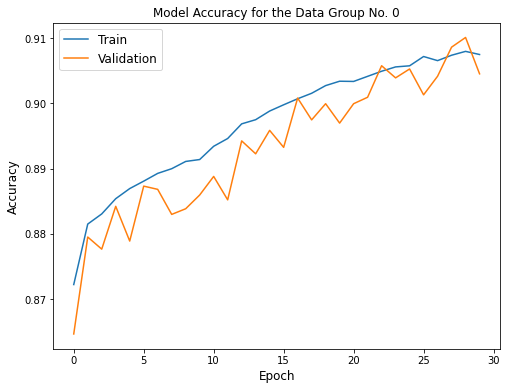

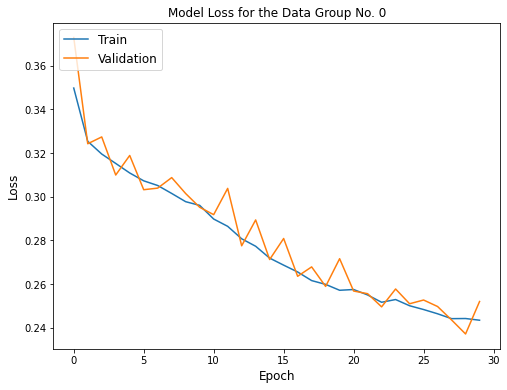

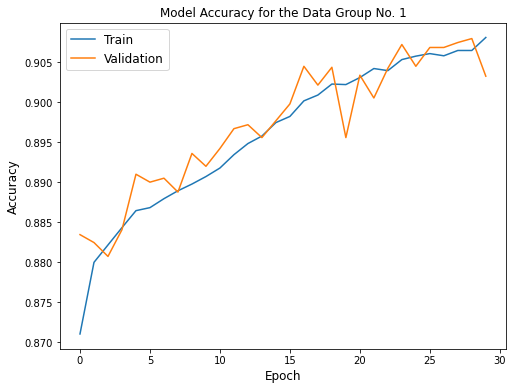

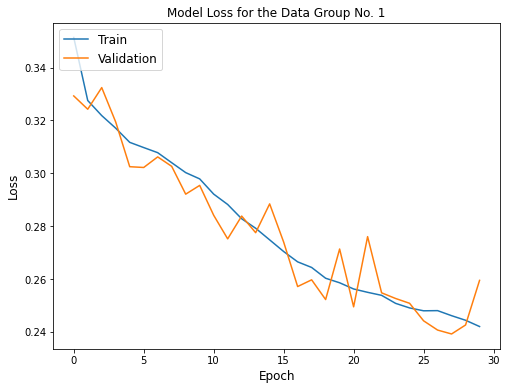

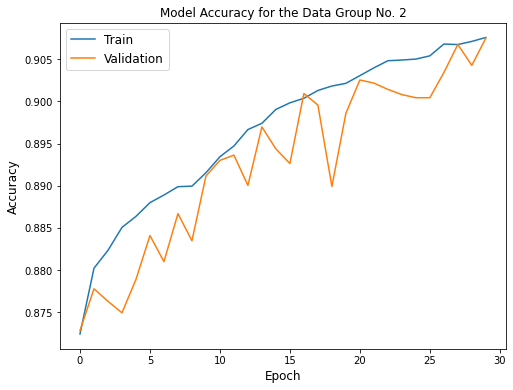

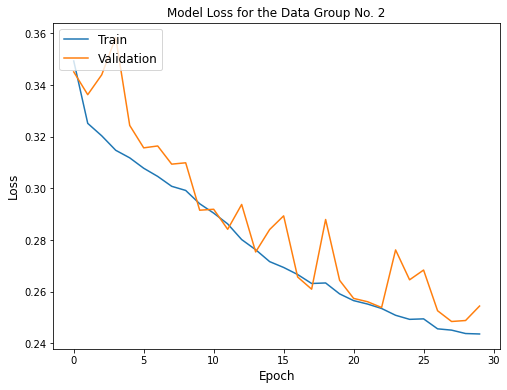

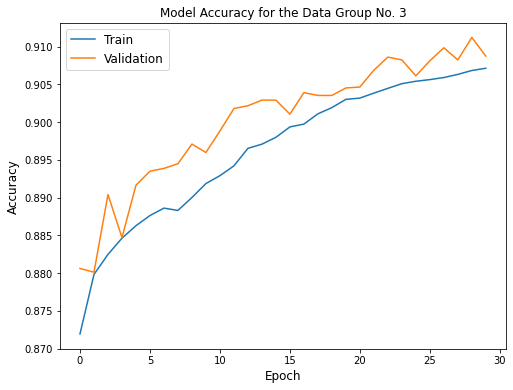

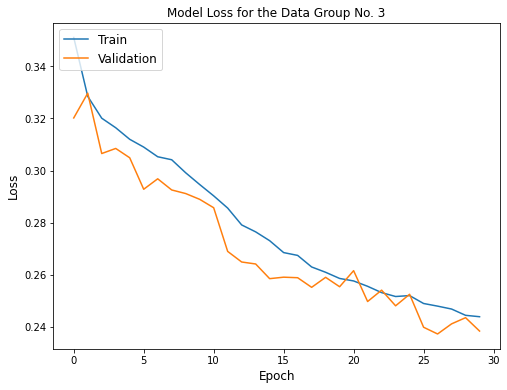

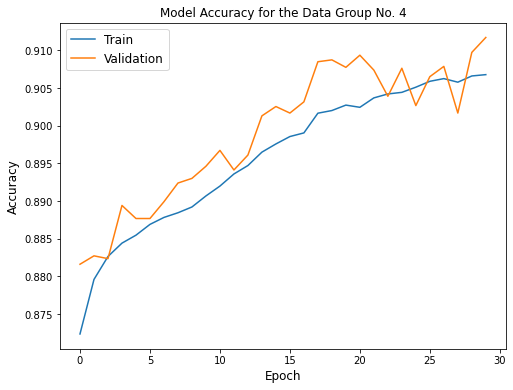

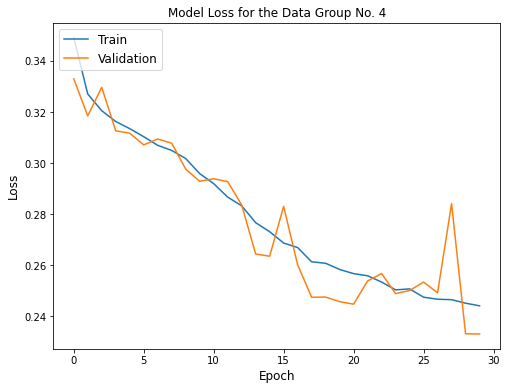

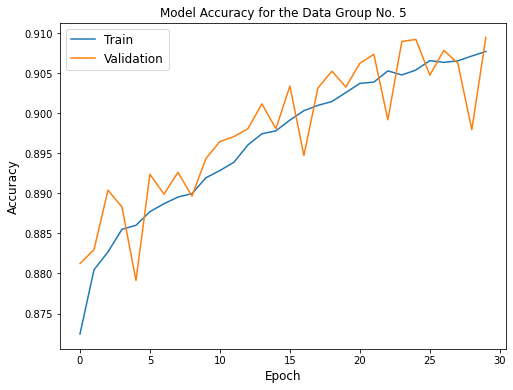

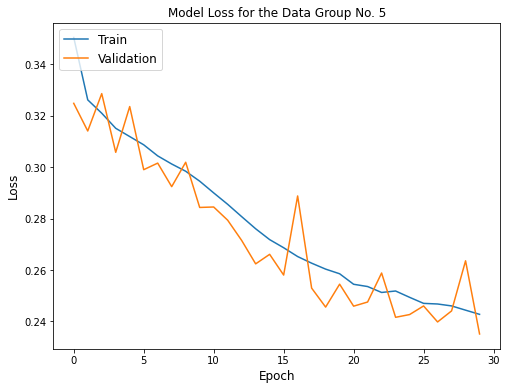

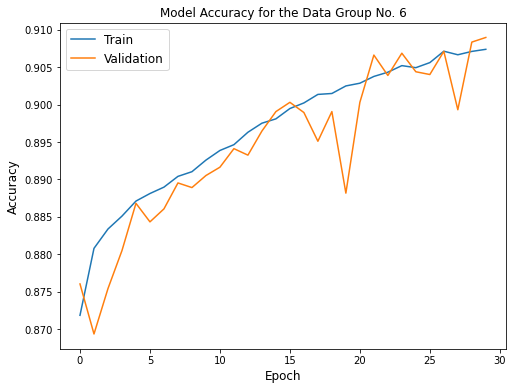

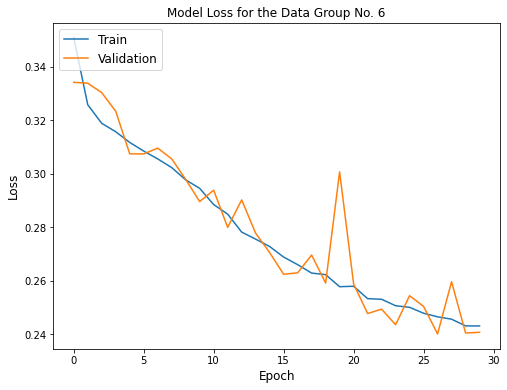

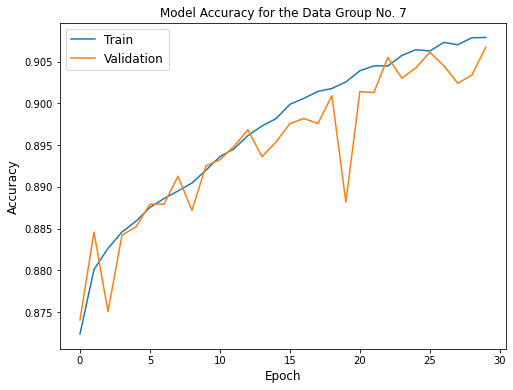

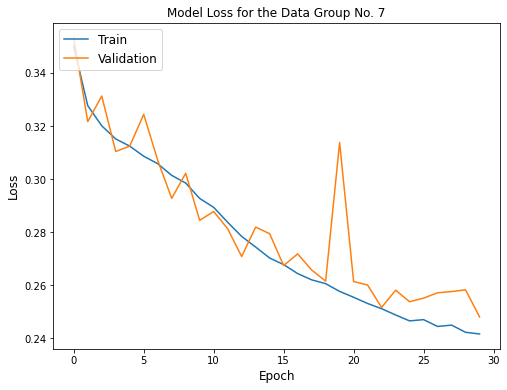

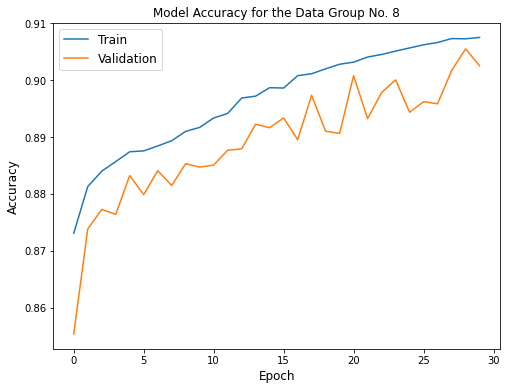

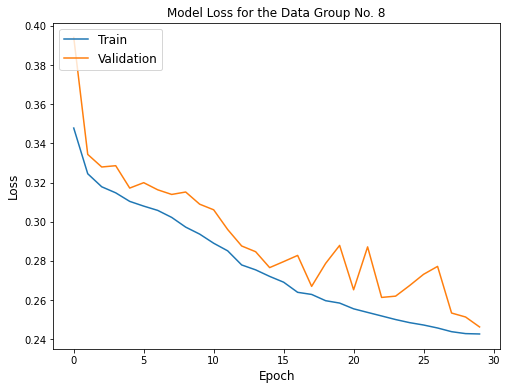

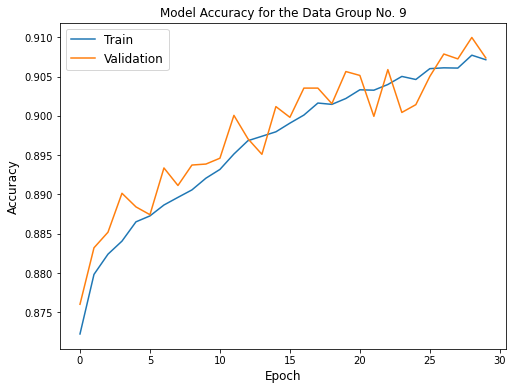

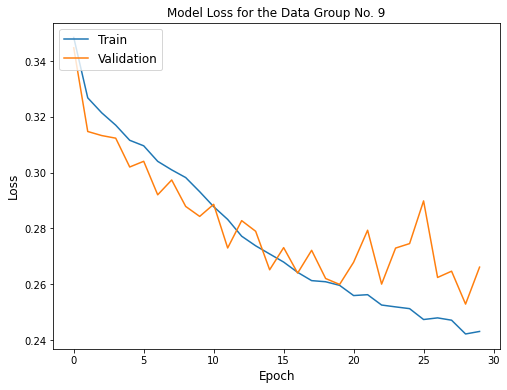

In [ ]:
# dicdata={'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0}

import pickle
import matplotlib.pyplot as plt

for key in dicdata:
  with open('/content/drive/MyDrive/Colab Notebooks/leave_one_out/history%s.json'%key, "rb") as file_pi:
    history = pickle.load(file_pi)



   # summarize history for accuracy
  plt.figure(figsize=(8,6))
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('Model Accuracy for the Data Group No. %s'%key, fontsize=12)
  plt.ylabel('Accuracy', fontsize=12)
  plt.xlabel('Epoch', fontsize=12)
  plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12)
  plt.show()
  # summarize history for loss
  plt.figure(figsize=(8,6))
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('Model Loss for the Data Group No. %s'%key, fontsize=12)
  plt.ylabel('Loss', fontsize=12)
  plt.xlabel('Epoch', fontsize=12)
  plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12)
  plt.show()


17/17 [==============================] - 2s 2ms/step


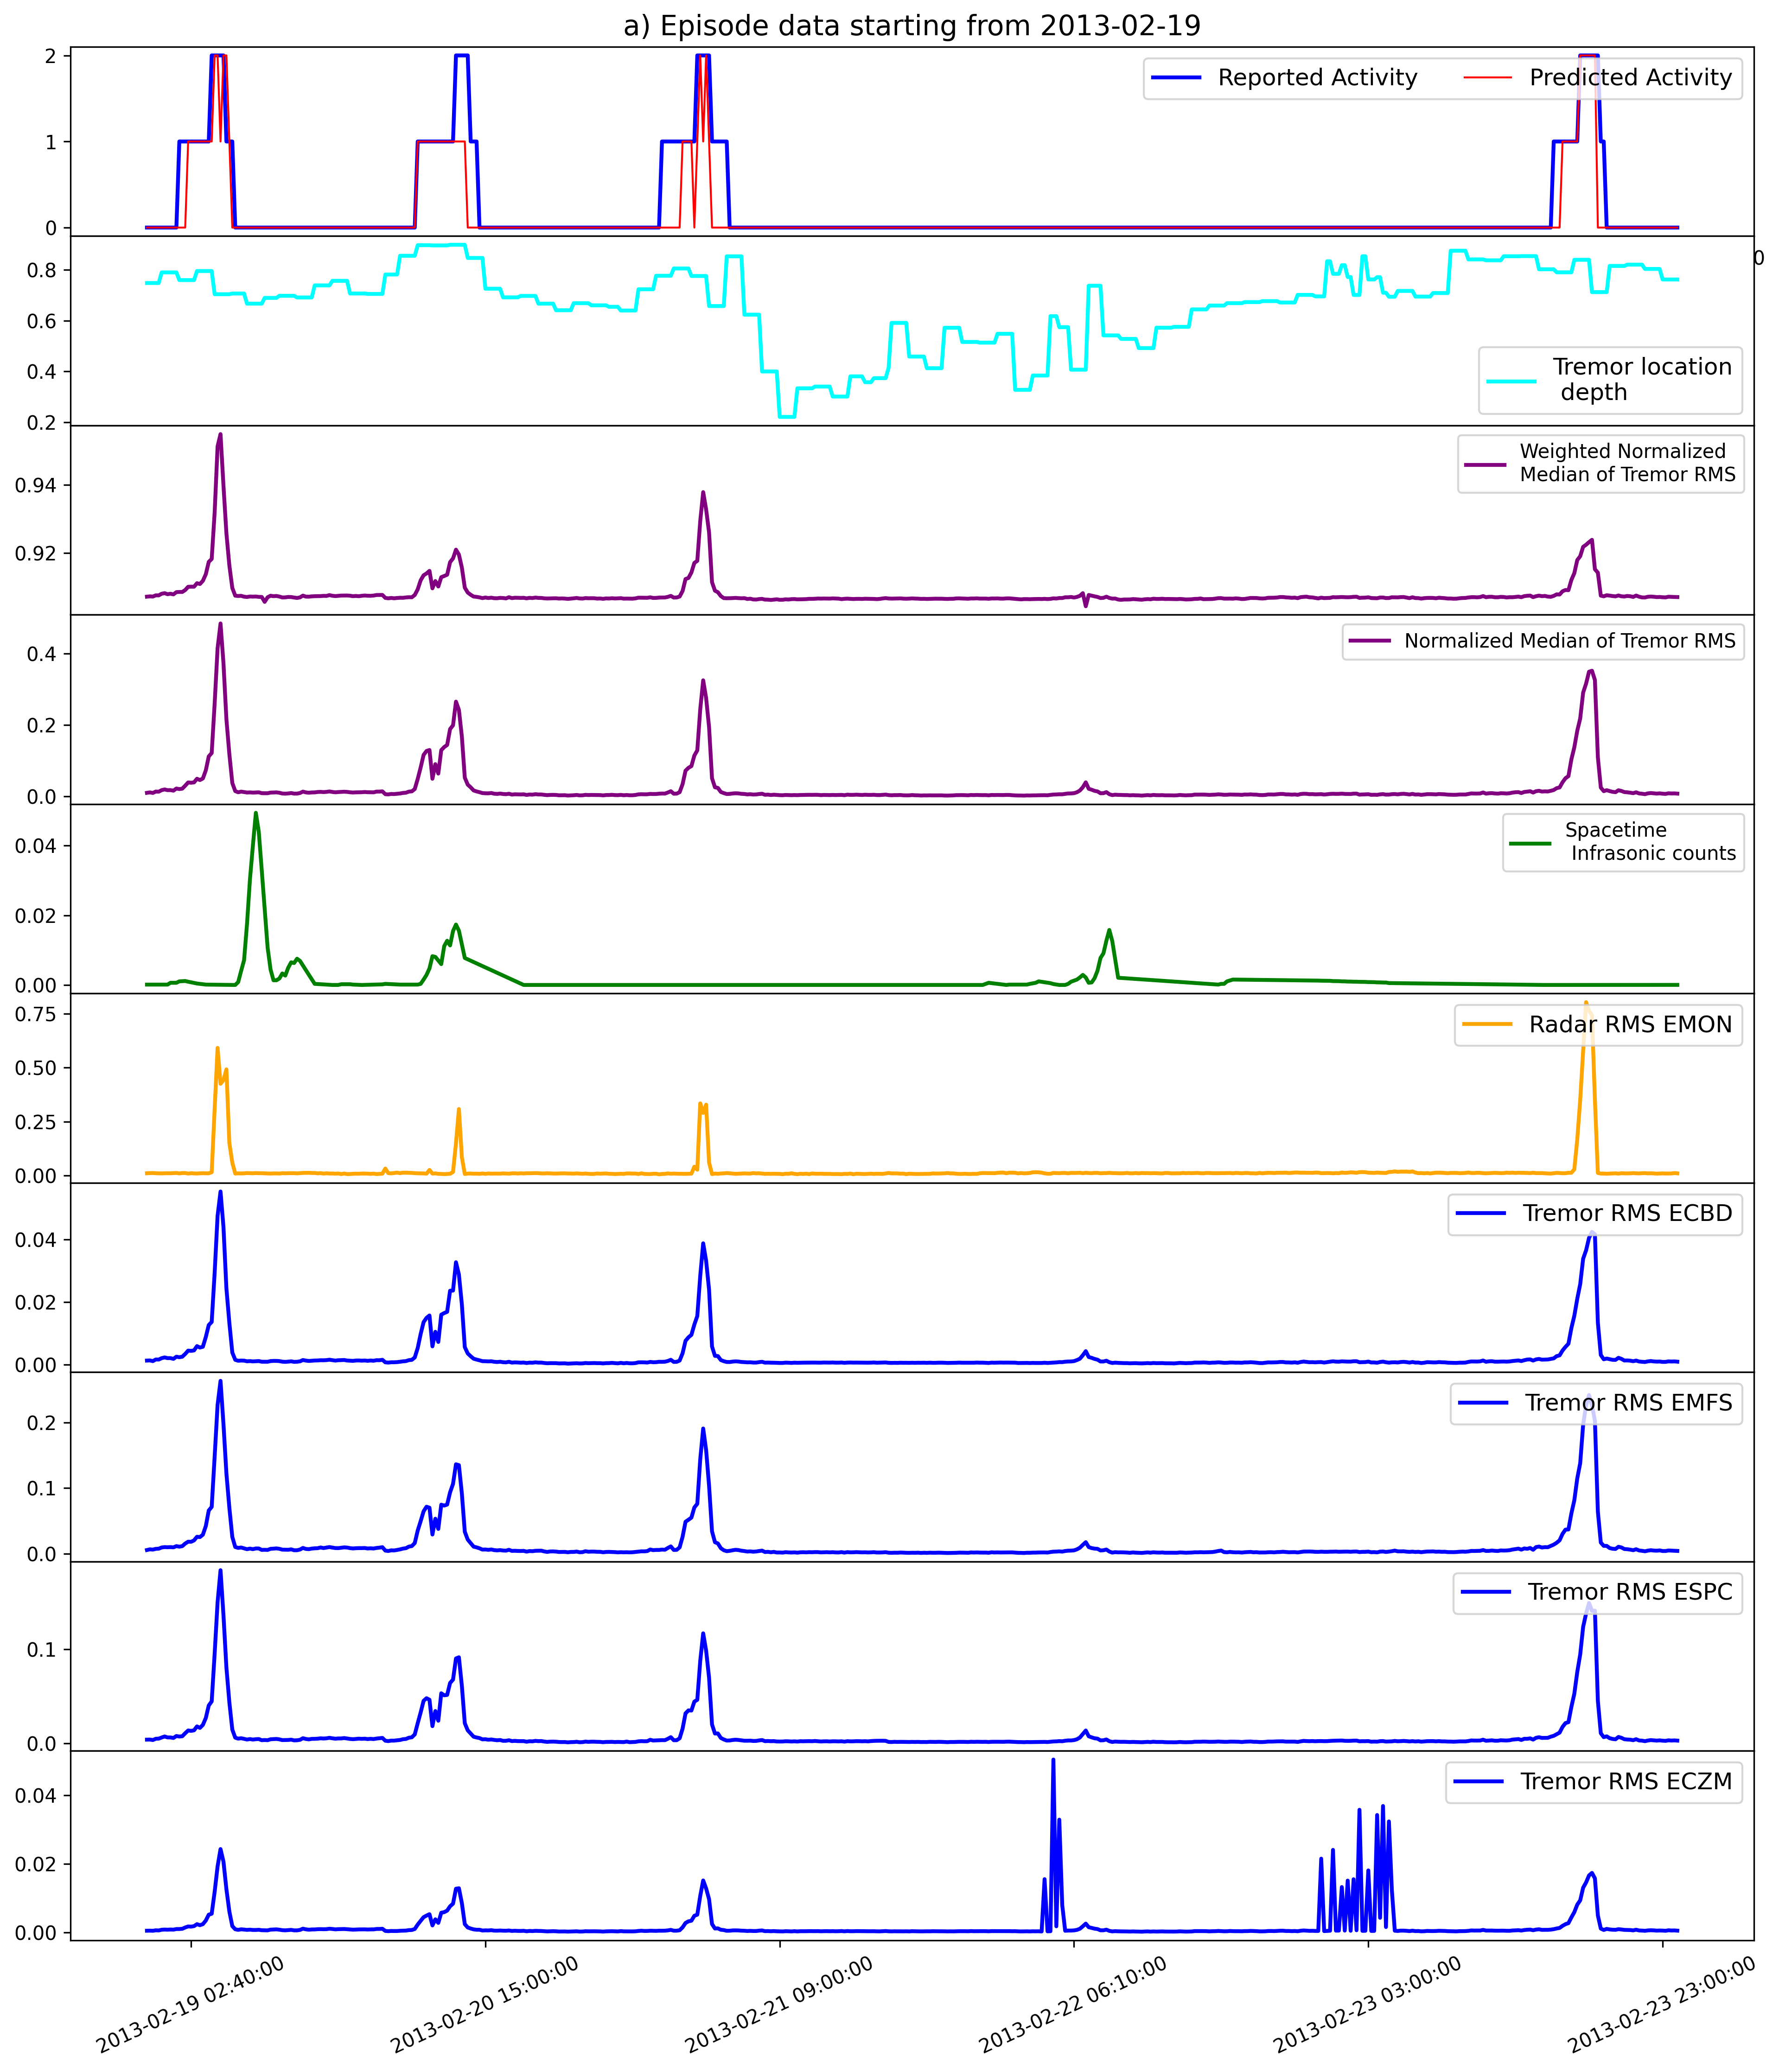

In [ ]:
# برای بررسی هر اپیزود  میشود به صورت مستقل با دانستن مدل لیو وان آوت انتخابی و تاریخ اپیزود از قسمت زیر استفاده کرد
from datetime import datetime
import matplotlib.pyplot as plt
dff= df.copy()
dff['Converted_time']=[datetime.timestamp(datetime.strptime(str(i), '%Y-%m-%d %H:%M:%S')) for i in df['date_time (month/day/year/hour/minute)']]
dfff = dff[['Tremor location depth in km',
 'Weighted Normalized Median of Tremor RMS',
 'Spacetime Infrasonic counts',
 'Normalized Median of Tremor RMS',
 'Tremor RMS EMFS',
 'Tremor RMS ECBD',
 'Radar RMS EMON',
 'Tremor RMS ESPC',
 'Tremor RMS ECZM']]
ep1n,  min_ep1n, max_ep1n = fnormdf(dfff)
ep1n['Converted_time'] = dff['Converted_time']
ep1n['Activity'] = dff['Activity']
# زمان شروع و پایان اپیزود را در قسمت زیر وارد کنید
ep_start = datetime.strptime('2013-02-19 00:00:00', '%Y-%m-%d %H:%M:%S')
ep_end = datetime.strptime('2013-02-23 23:59:00', '%Y-%m-%d %H:%M:%S')

startidx = ep1n[ep1n['Converted_time'] > ep_start.timestamp()]
endidx = ep1n[ep1n['Converted_time'] < ep_end.timestamp()] 
# common rows:
epp = startidx.merge(endidx, how = 'inner' ,indicator=False)
ep = epp.dropna()
hor = ep['Converted_time']
xlab = [datetime.fromtimestamp(i) for i in hor]
t=list(range(15,len(xlab),100))
tt=[]
for i in t:
  tt.append(xlab[i])
ep1tst = ep.to_numpy()
xep1 = ep1tst[:,:-2]
yep1 = to_categorical(ep1tst[:,-1])


# # مدل انتخابی را از بین مدل ها انتخاب کنید
modelpath = '/content/drive/MyDrive/Colab Notebooks/leave_one_out/optm4.hdf5'
reconstructed_model = keras.models.load_model(modelpath)
ep1predictions = reconstructed_model.predict(xep1)

fig, axs = plt.subplots(10, sharex=False, sharey=False, gridspec_kw={'hspace': 0}, figsize=(13,15), dpi=300)
axs[0].plot(list(range(len(yep1))), cat2lbl(yep1), color='blue', linewidth = 2)
axs[0].plot(list(range(len(yep1))), cat2lbl(ep1predictions),color = 'red', linewidth = 1)
axs[0].set_title('a) Episode data starting from %s'%str(ep_start.date()), fontsize='x-large')
axs[0].set_ylim(auto= True )
axs[0].set_xticks(t)
axs[0].set_xticklabels(tt)
axs[0].legend(['Reported Activity', 'Predicted Activity'], loc=1, fontsize='large', ncol=2)

axs[1].plot(list(range(len(yep1))), ep['Tremor location depth in km'], color='cyan', linewidth = 2)
axs[1].legend(['Tremor location\n depth'], loc=4, fontsize='large')

axs[2].plot(list(range(len(yep1))),ep['Weighted Normalized Median of Tremor RMS'], color='purple', linewidth = 2)
axs[2].legend(['Weighted Normalized\nMedian of Tremor RMS'])

axs[3].plot(list(range(len(yep1))),ep['Normalized Median of Tremor RMS'], color='purple', linewidth = 2)
axs[3].legend(['Normalized Median of Tremor RMS'])

axs[4].plot(list(range(len(yep1))),ep['Spacetime Infrasonic counts'], color='green', linewidth = 2)
axs[4].legend(['Spacetime\n Infrasonic counts'])

axs[5].plot(list(range(len(yep1))),ep['Radar RMS EMON'], color='orange', linewidth = 2)
axs[5].legend(['Radar RMS EMON'], loc=1, fontsize='large')
axs[6].plot(list(range(len(yep1))),ep['Tremor RMS ECBD'], color='blue' , linewidth = 2)
axs[6].legend(['Tremor RMS ECBD'], loc=1, fontsize='large')
axs[7].plot(list(range(len(yep1))),ep['Tremor RMS EMFS'], color='blue' , linewidth = 2)
axs[7].legend(['Tremor RMS EMFS'], loc=1, fontsize='large')
axs[8].plot(list(range(len(yep1))),ep['Tremor RMS ESPC'], color='blue' , linewidth = 2)
axs[8].legend(['Tremor RMS ESPC'], loc=1, fontsize='large')
axs[9].plot(list(range(len(yep1))),ep['Tremor RMS ECZM'], color='blue' , linewidth = 2)
axs[9].legend(['Tremor RMS ECZM'], loc=1, fontsize='large')
axs[9].set_xticks(t)
axs[9].set_xticklabels(tt, rotation=25)
plt.tight_layout()

              precision    recall  f1-score   support

           0      0.940     1.000     0.969       440
           1      0.780     0.542     0.640        59
           2      0.917     0.500     0.647        22

    accuracy                          0.927       521
   macro avg      0.879     0.681     0.752       521
weighted avg      0.921     0.927     0.918       521



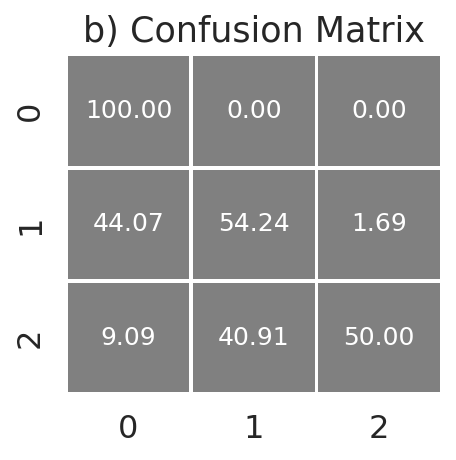

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
import seaborn as sn
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from matplotlib.colors import ListedColormap
trr = metrics.classification_report(cat2lbl(yep1), cat2lbl(ep1predictions), digits=3)

# trrs = np.array([100*trr[0,:]/sum(trr[0,:]), 100*trr[1,:]/sum(trr[1,:]), 100*trr[2,:]/sum(trr[2,:])])


matrix_confusiontr = confusion_matrix(cat2lbl(yep1), cat2lbl(ep1predictions))
print(trr)
plt.figure(figsize=(11,3), dpi=150)
sn.set(font_scale=1.4)
trrs = np.array([100*matrix_confusiontr[0,:]/sum(matrix_confusiontr[0,:]), 100*matrix_confusiontr[1,:]/sum(matrix_confusiontr[1,:]), 100*matrix_confusiontr[2,:]/sum(matrix_confusiontr[2,:])])
array = trrs
df_cm = pd.DataFrame(array, range(3), range(3))
plt.subplot(131)
plt.title("b) Confusion Matrix")
with sn.axes_style('darkgrid'):
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, fmt='.2f', cmap=ListedColormap(['gray']), linewidths=1.3)


In [ ]:
matrix_confusiontr

array([[440,   0,   0],
       [ 26,  32,   1],
       [  2,   9,  11]])

155/155 [==============================] - 0s 2ms/step


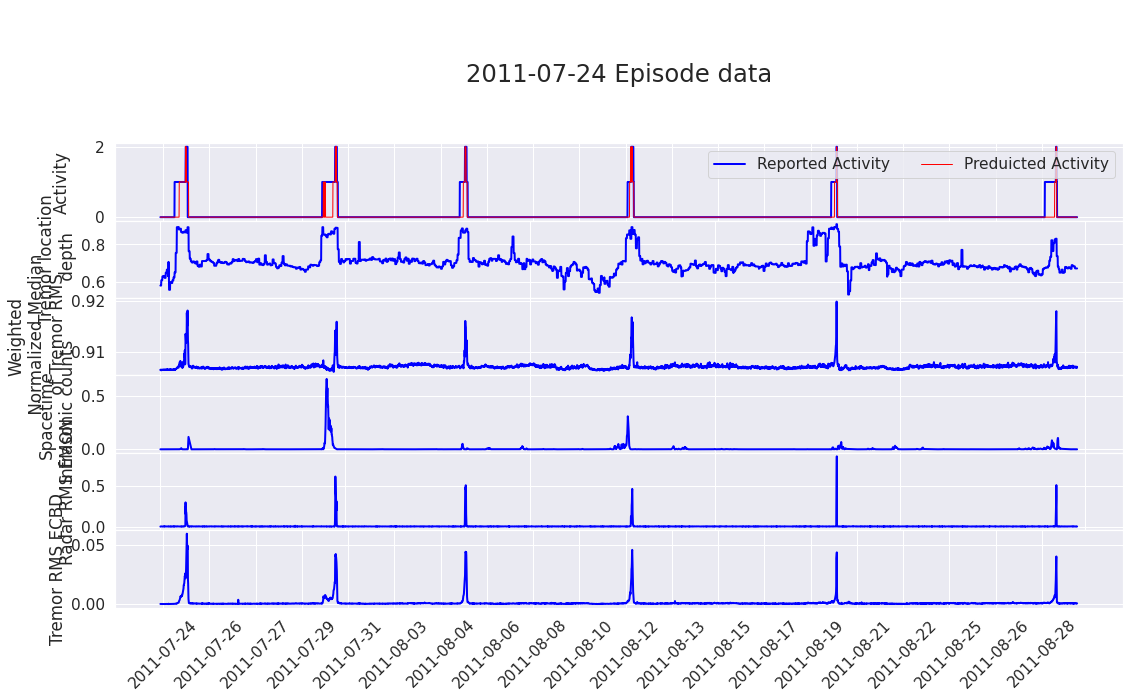

In [ ]:
# برای بررسی هر اپیزود  میشود به صورت مستقل با دانستن مدل لیو وان آوت انتخابی و تاریخ اپیزود از قسمت زیر استفاده کرد
from datetime import datetime
dff= df.copy()
dff['Converted_time']=[datetime.timestamp(datetime.strptime(str(i), '%Y-%m-%d %H:%M:%S')) for i in df['date_time (month/day/year/hour/minute)']]
dfff = dff[['Tremor location depth in km',
 'Weighted Normalized Median of Tremor RMS',
 'Spacetime Infrasonic counts',
 'Normalized Median of Tremor RMS',
 'Tremor RMS EMFS',
 'Tremor RMS ECBD',
 'Radar RMS EMON',
 'Tremor RMS ESPC',
 'Tremor RMS ECZM']]
ep1n,  min_ep1n, max_ep1n = fnormdf(dfff)
ep1n['Converted_time'] = dff['Converted_time']
ep1n['Activity'] = dff['Activity']
# زمان شروع و پایان اپیزود را در قسمت زیر وارد کنید
ep_start = datetime.strptime('2011-07-24 00:00:00', '%Y-%m-%d %H:%M:%S')
ep_end = datetime.strptime('2011-08-29 23:59:00', '%Y-%m-%d %H:%M:%S')

startidx = ep1n[ep1n['Converted_time'] > ep_start.timestamp()]
endidx = ep1n[ep1n['Converted_time'] < ep_end.timestamp()] 
# common rows:
epp = startidx.merge(endidx, how = 'inner' ,indicator=False)
ep = epp.dropna()
hor = ep['Converted_time']
xlab = [datetime.fromtimestamp(i).date() for i in hor]
t=list(range(15,len(xlab),250))
tt=[]
for i in t:
  tt.append(xlab[i])
ep1tst = ep.to_numpy()
xep1 = ep1tst[:,:-2]
yep1 = to_categorical(ep1tst[:,-1])


# # مدل انتخابی را از بین مدل ها انتخاب کنید
modelpath = '/content/drive/MyDrive/Colab Notebooks/leave_one_out/optm5.hdf5'
reconstructed_model = keras.models.load_model(modelpath)
ep1predictions = reconstructed_model.predict(xep1)

fig, axs = plt.subplots(6, sharex=False, sharey=False, gridspec_kw={'hspace': 0}, figsize=(16,10))
# fig.suptitle('%s Episode data\n\n'%str(ep_start.date()))

axs[0].plot(list(range(len(yep1))), cat2lbl(yep1), color='blue', linewidth = 2)
axs[0].plot(list(range(len(yep1))), cat2lbl(ep1predictions),color = 'red', linewidth = 1)
axs[0].set_title('\n\n%s Episode data\n\n'%str(ep_start.date()), fontsize='x-large')
axs[0].set_ylabel('Activity\n')
axs[0].set_ylim(auto= True )
axs[0].set_xticks(t)
axs[0].set_xticklabels(tt)
axs[0].legend(['Reported Activity', 'Preduicted Activity'], ncol=3, loc='best')

axs[1].plot(list(range(len(yep1))), ep['Tremor location depth in km'], color='blue', linewidth = 2)
axs[1].set_ylabel('Tremor location\n depth')

axs[2].plot(list(range(len(yep1))),ep['Weighted Normalized Median of Tremor RMS'], color='blue', linewidth = 2)
axs[2].set_ylabel('Weighted\n Normalized Median\n of Tremor RMS')

axs[3].plot(list(range(len(yep1))),ep['Spacetime Infrasonic counts'], color='blue', linewidth = 2)
axs[3].set_ylabel('Spacetime\n Infrasonic counts')

axs[4].plot(list(range(len(yep1))),ep['Radar RMS EMON'], color='blue', linewidth = 2)
axs[4].set_ylabel('Radar RMS EMON')

axs[5].plot(list(range(len(yep1))),ep['Tremor RMS ECBD'] , color='blue', linewidth = 2)
axs[5].set_ylabel('Tremor RMS ECBD')
axs[5].set_xticks(t)
axs[5].set_xticklabels(tt, rotation=45)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


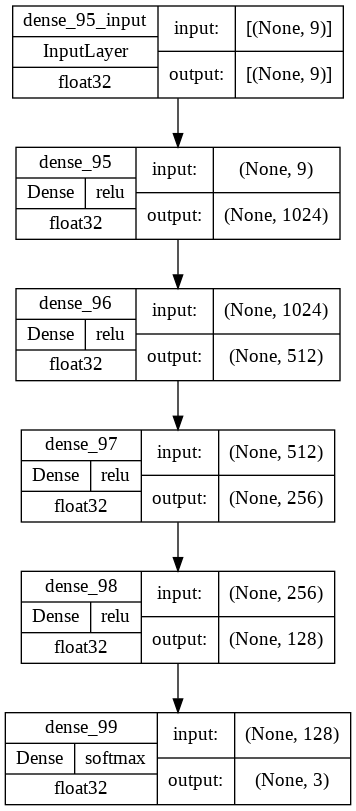

In [ ]:
cm =dict()   #confusion matrix
report = dict()  #precision and recall report
ks =  dict()   #kappa index
from collections import defaultdict
from keras.callbacks import ModelCheckpoint
import numpy as np

for key in dicdata:
  cm['%s'%key] = defaultdict(list)
  report['%s'%key] = defaultdict(list)
  ks['%s'%key] = defaultdict(list)
  # Extracting model input-targets from dicdata (dictionary which contains data instances)
  xtst = dicdata[key]['tstpred'].to_numpy()
  yts = dicdata[key]['tsttrgt'].to_numpy()
  xtrt = dicdata[key]['trnpred']
  ytr = dicdata[key]['trntrgt'].to_numpy()

  # Data augnebtaion for class to instances 
  xtrt['Activity'] = ytr
  aug2 = xtrt[xtrt['Activity']==2]
  naug2 = 5000
  outaug2 = dataug(aug2, "Activity", 2, naug2, 3, mode=1)
  xtrt = np.append(xtrt, outaug2.iloc[:,:].to_numpy(), axis=0 )
  ytr = np.append(ytr,np.ones((naug2,))*2, axis=0 )
  xtr = xtrt[:,:-1]
  xts = xtst[:,:-1]
  val_per = 5
  validx = np.random.randint(0, ytr.shape[0], size=int(ytr.shape[0]*(val_per*0.01)), dtype=int)
  xvl = xtr[validx,:]
  yvl = ytr[validx,]
  xtr = np.delete(xtr,validx, axis=0)
  ytr = np.delete(ytr,validx, axis=0)

  ytr = to_categorical(ytr)
  yts = to_categorical(yts)
  yvl = to_categorical(yvl)
  
  # Defining and compiling models
  filepath = '/content/drive/MyDrive/Colab Notebooks/leave_one_out/optm%s.hdf5'%key
  checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks = [checkpoint]
  model = Sequential()
  model.add(Dense(1024, activation='relu', input_dim=xtr.shape[1]))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

 
plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)


In [ ]:
import pickle
filename = "/content/drive/MyDrive/Colab Notebooks/leave_one_out/report.pkl"
with open(filename, 'rb') as f:
    conf_mat = pickle.load(f)

for key in conf_mat.keys():
  for lbl in conf_mat[key]:
    print(key, "==>", lbl, "==>", "\n", conf_mat[key][lbl])


0 ==> tr ==> 
               precision    recall  f1-score   support

           0      0.900     0.988     0.942    118335
           1      0.924     0.571     0.706     30242
           2      0.993     0.988     0.990      5054

    accuracy                          0.906    153631
   macro avg      0.939     0.849     0.879    153631
weighted avg      0.908     0.906     0.897    153631

0 ==> vl ==> 
               precision    recall  f1-score   support

           0      0.897     0.989     0.941      6183
           1      0.931     0.566     0.704      1619
           2      0.996     0.985     0.991       273

    accuracy                          0.905      8075
   macro avg      0.941     0.847     0.879      8075
weighted avg      0.907     0.905     0.895      8075

0 ==> ts ==> 
               precision    recall  f1-score   support

           0      0.895     0.987     0.939     13785
           1      0.914     0.552     0.688      3555
           2      0.927     0.

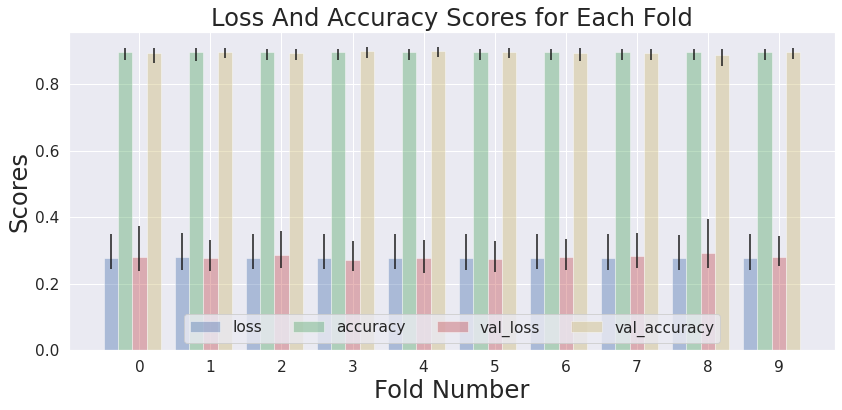

In [ ]:
dicdata={'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0}
import pickle

a_loss, mi_loss, ma_loss = [], [], []
a_accuracy, mi_accuracy, ma_accuracy = [], [], []
a_val_loss, mi_val_loss, ma_val_loss = [], [], []
a_val_accuracy, mi_val_accuracy, ma_val_accuracy = [], [], []

for key in dicdata:
  with open('/content/drive/MyDrive/Colab Notebooks/leave_one_out/history%s.json'%key, "rb") as file_pi:
    history = pickle.load(file_pi)
    
    for lbl in history.keys():
      # print(key, "==>", "\n", lbl, history[lbl])
      if lbl == "loss":
        a_loss.append(sum(history[lbl])/len(history[lbl]))
        mi_loss.append(min(history[lbl]))
        ma_loss.append(max(history[lbl]))
      if lbl == "accuracy":
        a_accuracy.append(sum(history[lbl])/len(history[lbl]))
        mi_accuracy.append(min(history[lbl]))
        ma_accuracy.append(max(history[lbl]))
      if lbl == "val_loss":
        a_val_loss.append(sum(history[lbl])/len(history[lbl]))
        mi_val_loss.append(min(history[lbl]))
        ma_val_loss.append(max(history[lbl]))
      if lbl == "val_accuracy":
        a_val_accuracy.append(sum(history[lbl])/len(history[lbl]))
        mi_val_accuracy.append(min(history[lbl]))
        ma_val_accuracy.append(max(history[lbl]))

import numpy as np
import matplotlib.pyplot as plt


n_groups = 10
fig, ax = plt.subplots(figsize=(12,6))
index = np.arange(0,n_groups*5,1)
bar_width = 1
opacity = 0.4
error_config = {'ecolor': '0.1'}

def errcalc(av,min,max):
  low=[av[i]-min[i] for i in range(len(av))]
  high=[max[i] - av[i] for i in range(len(av))]
  return low, high


l, h = errcalc(a_loss,mi_loss,ma_loss)
rects1 = plt.bar(index[0::5], a_loss, bar_width, alpha=opacity, color='b', yerr=[l,h], error_kw=error_config, label='loss')

l, h = errcalc(a_accuracy,mi_accuracy,ma_accuracy)
rects2 = plt.bar(index[1::5], a_accuracy, bar_width, alpha=opacity, color='g', yerr=[l,h], error_kw=error_config, label='accuracy')

l, h = errcalc(a_val_loss,mi_val_loss,ma_val_loss)
rects3 = plt.bar(index[2::5], a_val_loss, bar_width, alpha=opacity, color='r', yerr=[l,h], error_kw=error_config, label='val_loss')

l, h = errcalc(a_val_accuracy,mi_val_accuracy,ma_val_accuracy)
rects4 = plt.bar(index[3::5], a_val_accuracy, bar_width, alpha=opacity, color='y', yerr=[l,h], error_kw=error_config, label='val_accuracy')

plt.xlabel('Fold Number', fontsize='x-large')
plt.ylabel('Scores', fontsize='x-large')
plt.title('Loss And Accuracy Scores for Each Fold', fontsize='x-large')
plt.xticks(index[2::5], ('0', '1', '2', '3', '4', '5', '6', '7', '8' , '9'))
plt.legend(loc = 'lower center' , ncol=4)

plt.tight_layout()
plt.show()



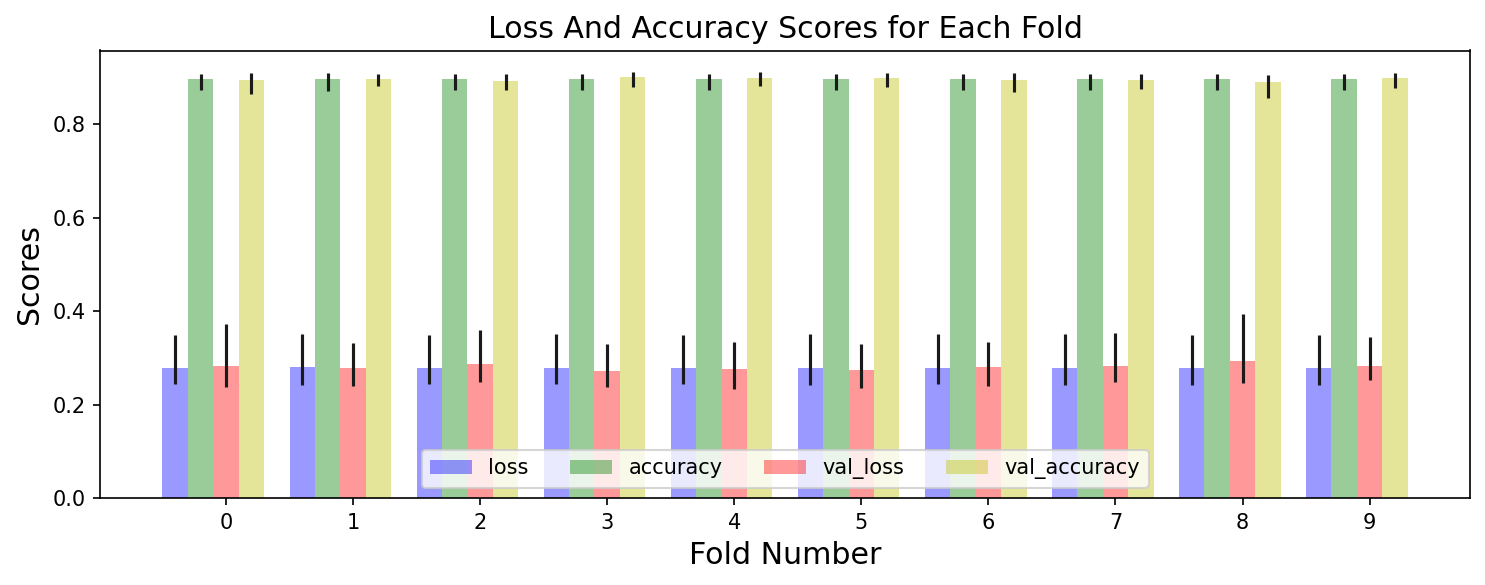

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n_groups = 10
fig, ax = plt.subplots(figsize=(10,4), dpi=150)
# fig.figsize=(12,6)/
index = np.arange(0,n_groups*5,1)
bar_width = 1
opacity = 0.4
error_config = {'ecolor': '0.1'}

def errcalc(av,min,max):
  low=[av[i]-min[i] for i in range(len(av))]
  high=[max[i] - av[i] for i in range(len(av))]
  return low, high


l, h = errcalc(a_loss,mi_loss,ma_loss)
rects1 = plt.bar(index[0::5], a_loss, bar_width, alpha=opacity, color='b', yerr=[l,h], error_kw=error_config, label='loss')

l, h = errcalc(a_accuracy,mi_accuracy,ma_accuracy)
rects2 = plt.bar(index[1::5], a_accuracy, bar_width, alpha=opacity, color='g', yerr=[l,h], error_kw=error_config, label='accuracy')

l, h = errcalc(a_val_loss,mi_val_loss,ma_val_loss)
rects3 = plt.bar(index[2::5], a_val_loss, bar_width, alpha=opacity, color='r', yerr=[l,h], error_kw=error_config, label='val_loss')

l, h = errcalc(a_val_accuracy,mi_val_accuracy,ma_val_accuracy)
rects4 = plt.bar(index[3::5], a_val_accuracy, bar_width, alpha=opacity, color='y', yerr=[l,h], error_kw=error_config, label='val_accuracy')

plt.xlabel('Fold Number', fontsize='x-large')
plt.ylabel('Scores', fontsize='x-large')
plt.title('Loss And Accuracy Scores for Each Fold', fontsize='x-large')
plt.xticks(index[2::5], ('0', '1', '2', '3', '4', '5', '6', '7', '8' , '9'))
plt.legend(loc = 'lower center' , ncol=4)

plt.tight_layout()
plt.show()

In [ ]:

index = np.arange(0,n_groups*5,1)
index[0::5]

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [ ]:
l, h

([0.03462759852409364,
  0.03730876843134562,
  0.034614064792792,
  0.03494014690319697,
  0.034972288707892096,
  0.035182292759418476,
  0.03493128716945648,
  0.03555576950311662,
  0.03457260330518086,
  0.035631784796714805],
 [0.07179183065891265,
  0.07206512888272604,
  0.07107724895079931,
  0.07221013953288397,
  0.07023846258719763,
  0.0724234774708748,
  0.07293635606765747,
  0.07277808636426925,
  0.07055659393469493,
  0.07068254649639127])

In [ ]:
del ListedColormap        

In [ ]:
whos

Variable              Type                          Data/Info
-------------------------------------------------------------
Dense                 type                          <class 'keras.layers.core.dense.Dense'>
ListedColormap        type                          <class 'matplotlib.colors.ListedColormap'>
Sequential            type                          <class 'keras.engine.sequential.Sequential'>
array                 ndarray                       3x3: 9 elems, type `int64`, 72 bytes
axs                   ndarray                       6: 6 elems, type `object`, 48 bytes
cat2lbl               function                      <function cat2lbl at 0x7f154c57bf80>
cohen_kappa_score     function                      <function cohen_kappa_score at 0x7f15bdf39b90>
confusion_matrix      function                      <function confusion_matrix at 0x7f15bdf39a70>
dataug                function                      <function dataug at 0x7f1563239170>
datetime              type               